In [1]:
import osmnx as ox
import geocoder
import matplotlib.pyplot as plt

In [2]:
location = geocoder.osm("Singapore")
print(location.latlng)
type(location.latlng)

[1.357107, 103.8194992]


list

In [10]:
query = 'Bukit, Singapore'  # Search query containing 'Bukit' in Singapore

# Retrieve the location using geocoder
location2 = geocoder.arcgis(query).latlng

# Check if location was found
if location2 is not None:
    latitude, longitude = location2
    print(f"The latitude and longitude of the town containing 'Bukit' in Singapore are: {latitude}, {longitude}")
else:
    print("Location not found")
location2    
#identifying lat-long point (from geocoder)
point = location2
# point = (1.2874,103.8525)
radius = 5000

The latitude and longitude of the town containing 'Bukit' in Singapore are: 1.2908800000000724, 103.85239000000007


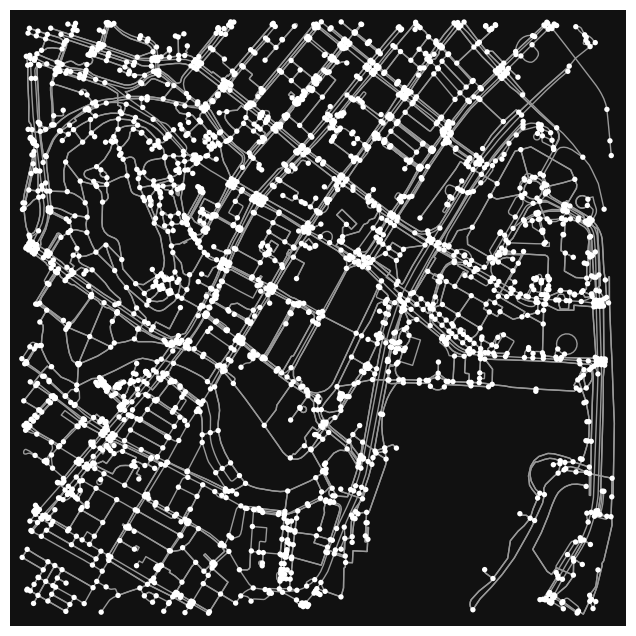

In [38]:
#retreiving graph from that point in a range of 2000 m
geodata = ox.graph_from_point(point, dist=radius, network_type='all')
#using osmnx library to plot the graph(matplotlib)
fig, ax = ox.plot_graph(geodata)

In [16]:
# print the full list of columns for the buildings layer
print(buildings.columns)

Index(['amenity', 'cuisine', 'name', 'wheelchair', 'geometry', 'access',
       'highway', 'level', 'addr:housenumber', 'addr:street',
       ...
       'public_transport', 'station', 'subway', 'addr:neighbourhood', 'ways',
       'type', 'name:es', 'name:vi', 'lit', 'surface'],
      dtype='object', length=141)


In [85]:
#check if the parameter exists in columns
requested_column = 'architect'
if requested_column in buildings.columns:
    print("The "+requested_column+" column exists in the buildings GeoDataFrame.")
else:
    print("The "+requested_column+" column does not exist in the buildings GeoDataFrame.")

The architect column exists in the buildings GeoDataFrame.


<AxesSubplot:>

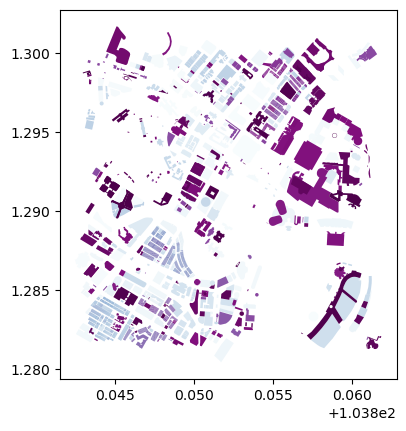

In [27]:
# tags dictionary, key-value
tags = {'building' : True}
#retrieving buildings from the same location
buildings = ox.geometries_from_point(point, tags, dist=radius)

buildings.plot(
               cmap = 'BuPu',
               )

<AxesSubplot:>

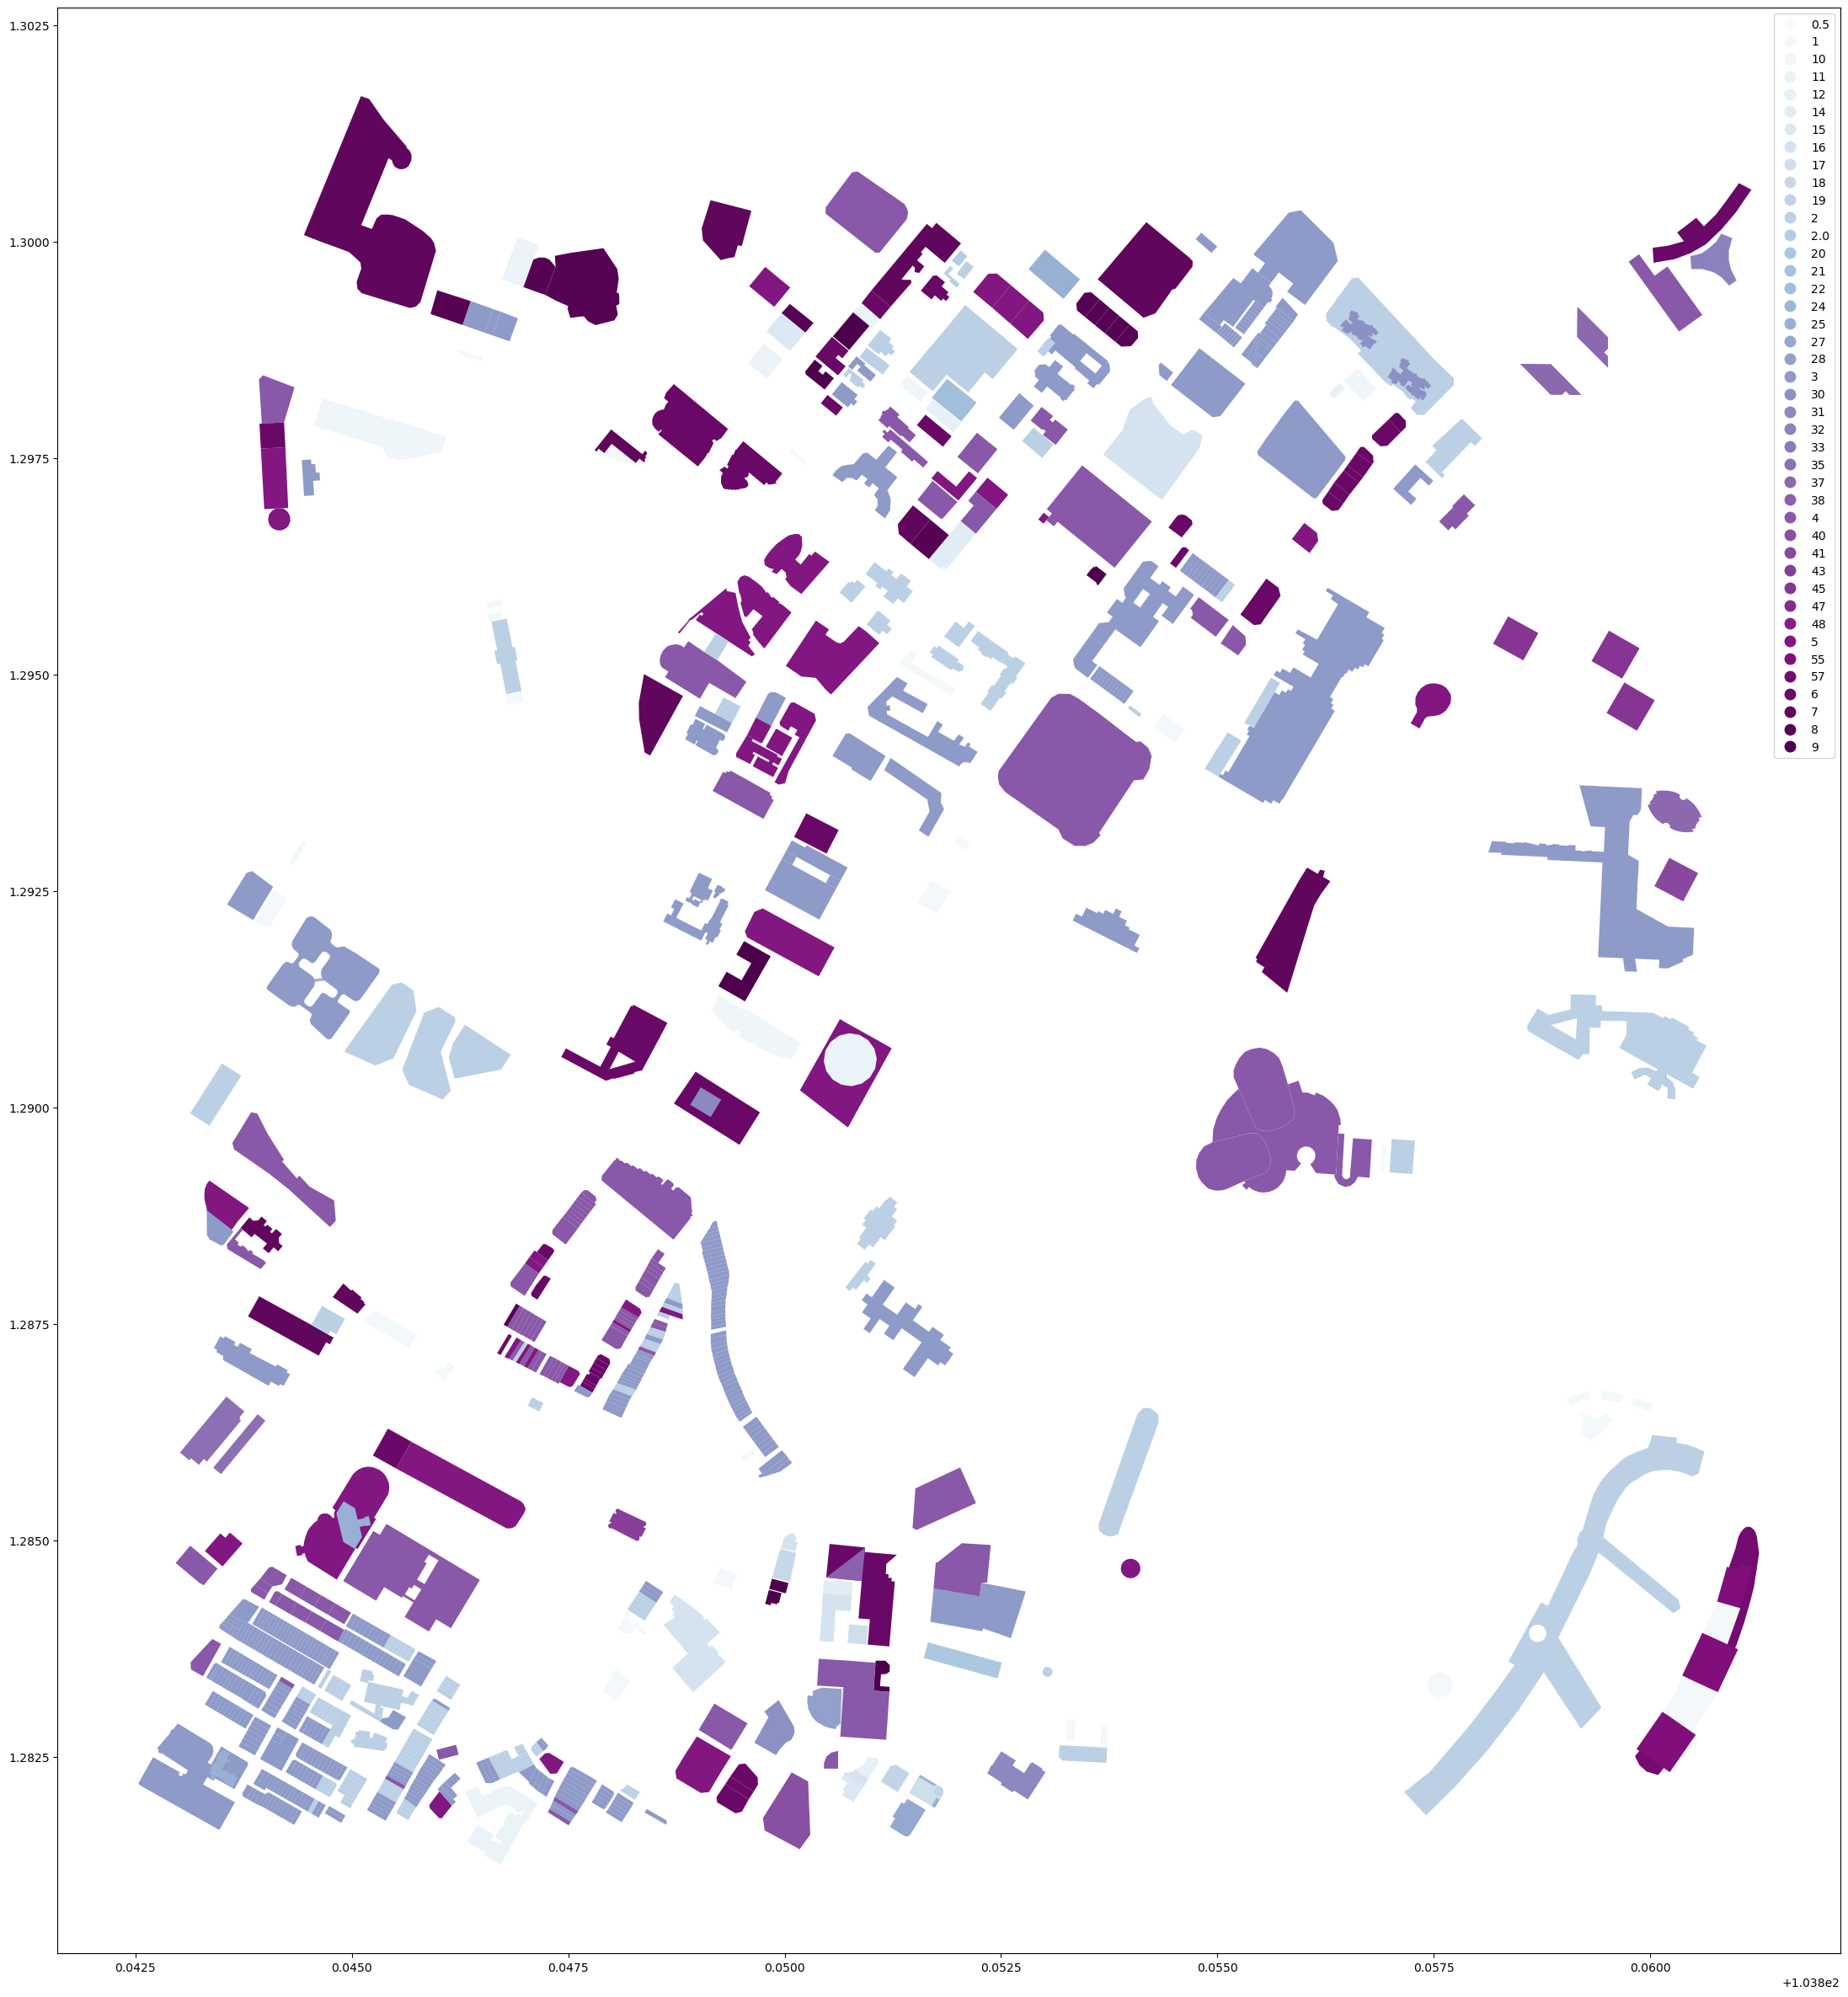

In [21]:
#matplotlib plotting, color buildings based on levels
fig, ax = plt.subplots(figsize= (30,30))

buildings.plot(column = 'building:levels', ax=ax,
               legend = True,
               cmap = 'BuPu',
               )

<AxesSubplot:>

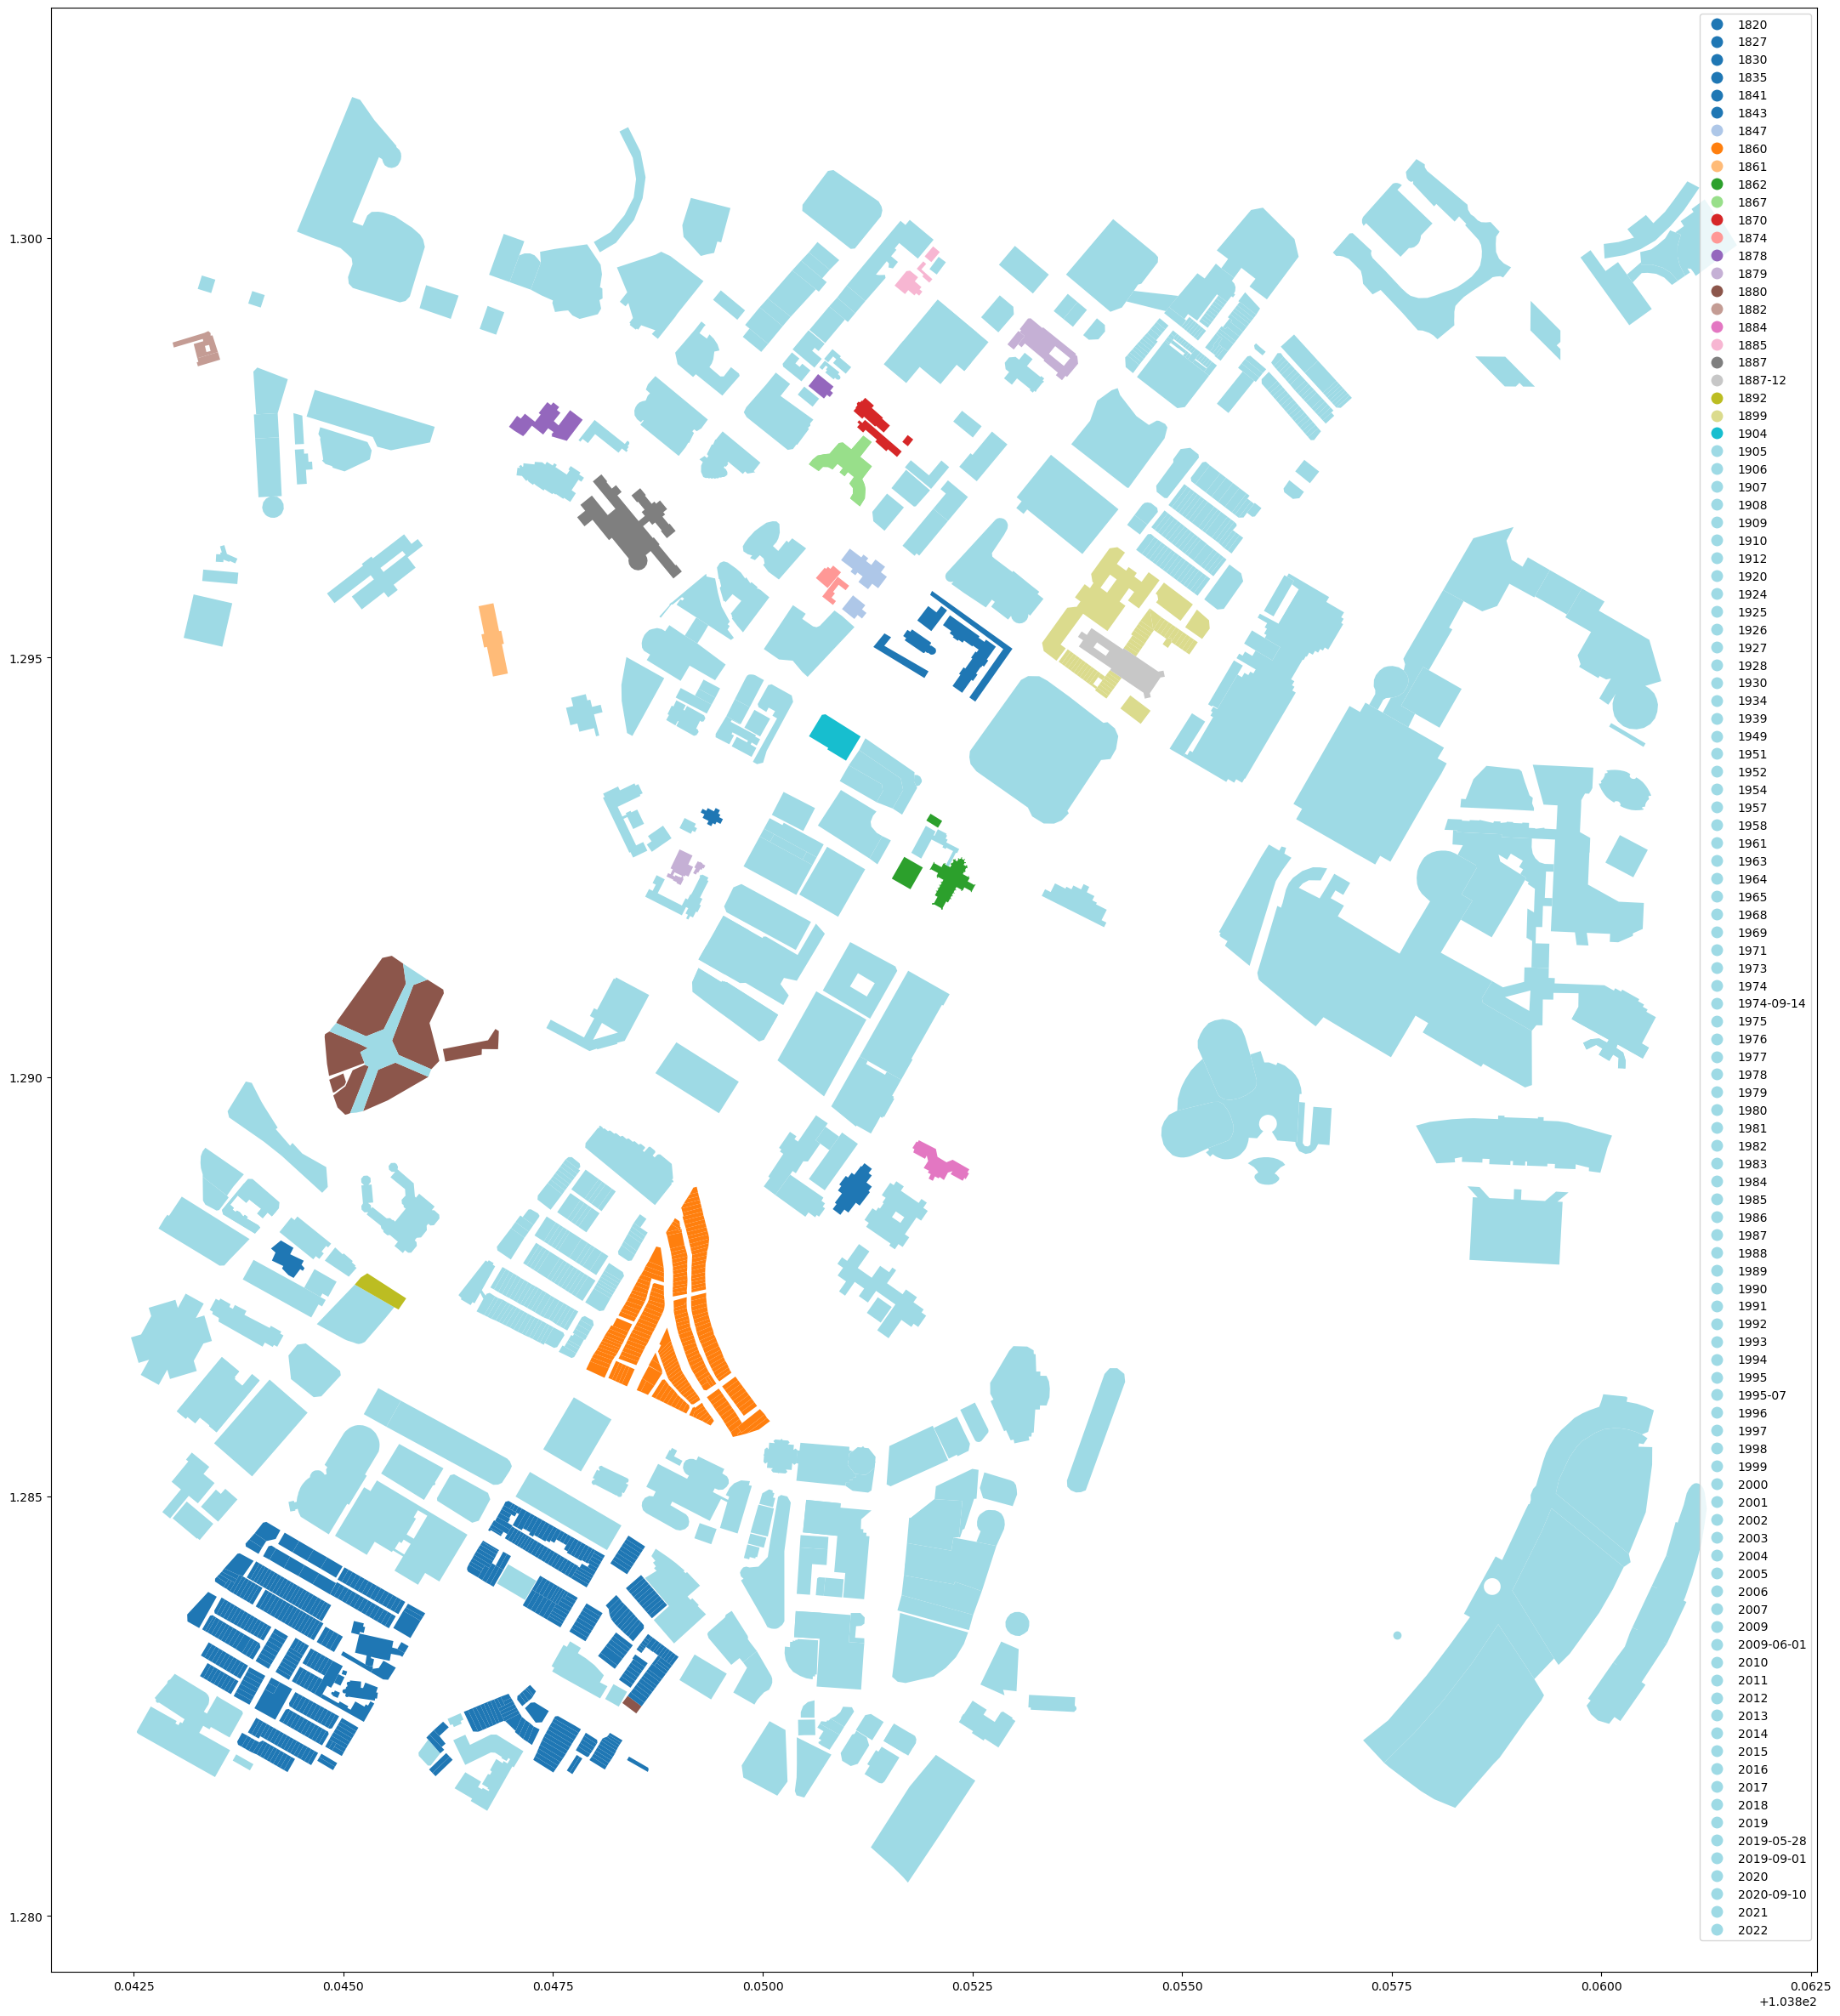

In [49]:
#visualizing building age
fig, ax = plt.subplots(figsize = (30,30))

buildings.plot(column='start_date', ax=ax, 
legend=True,
vmin = 5,
vmax = 25,
cmap='tab20',
)

In [63]:
# buildings_filtered = buildings[buildings['start_date'] >= 2000]
buildings.start_date

element_type  osmid     
node          7978432186    2020-09-10
way           32342169            1887
              39487263            1986
              44414529            1988
              44414530            1974
                               ...    
relation      9573322              NaN
              9573323             2005
              9964358             1986
              14107426             NaN
              14107427             NaN
Name: start_date, Length: 1724, dtype: object

<AxesSubplot:>

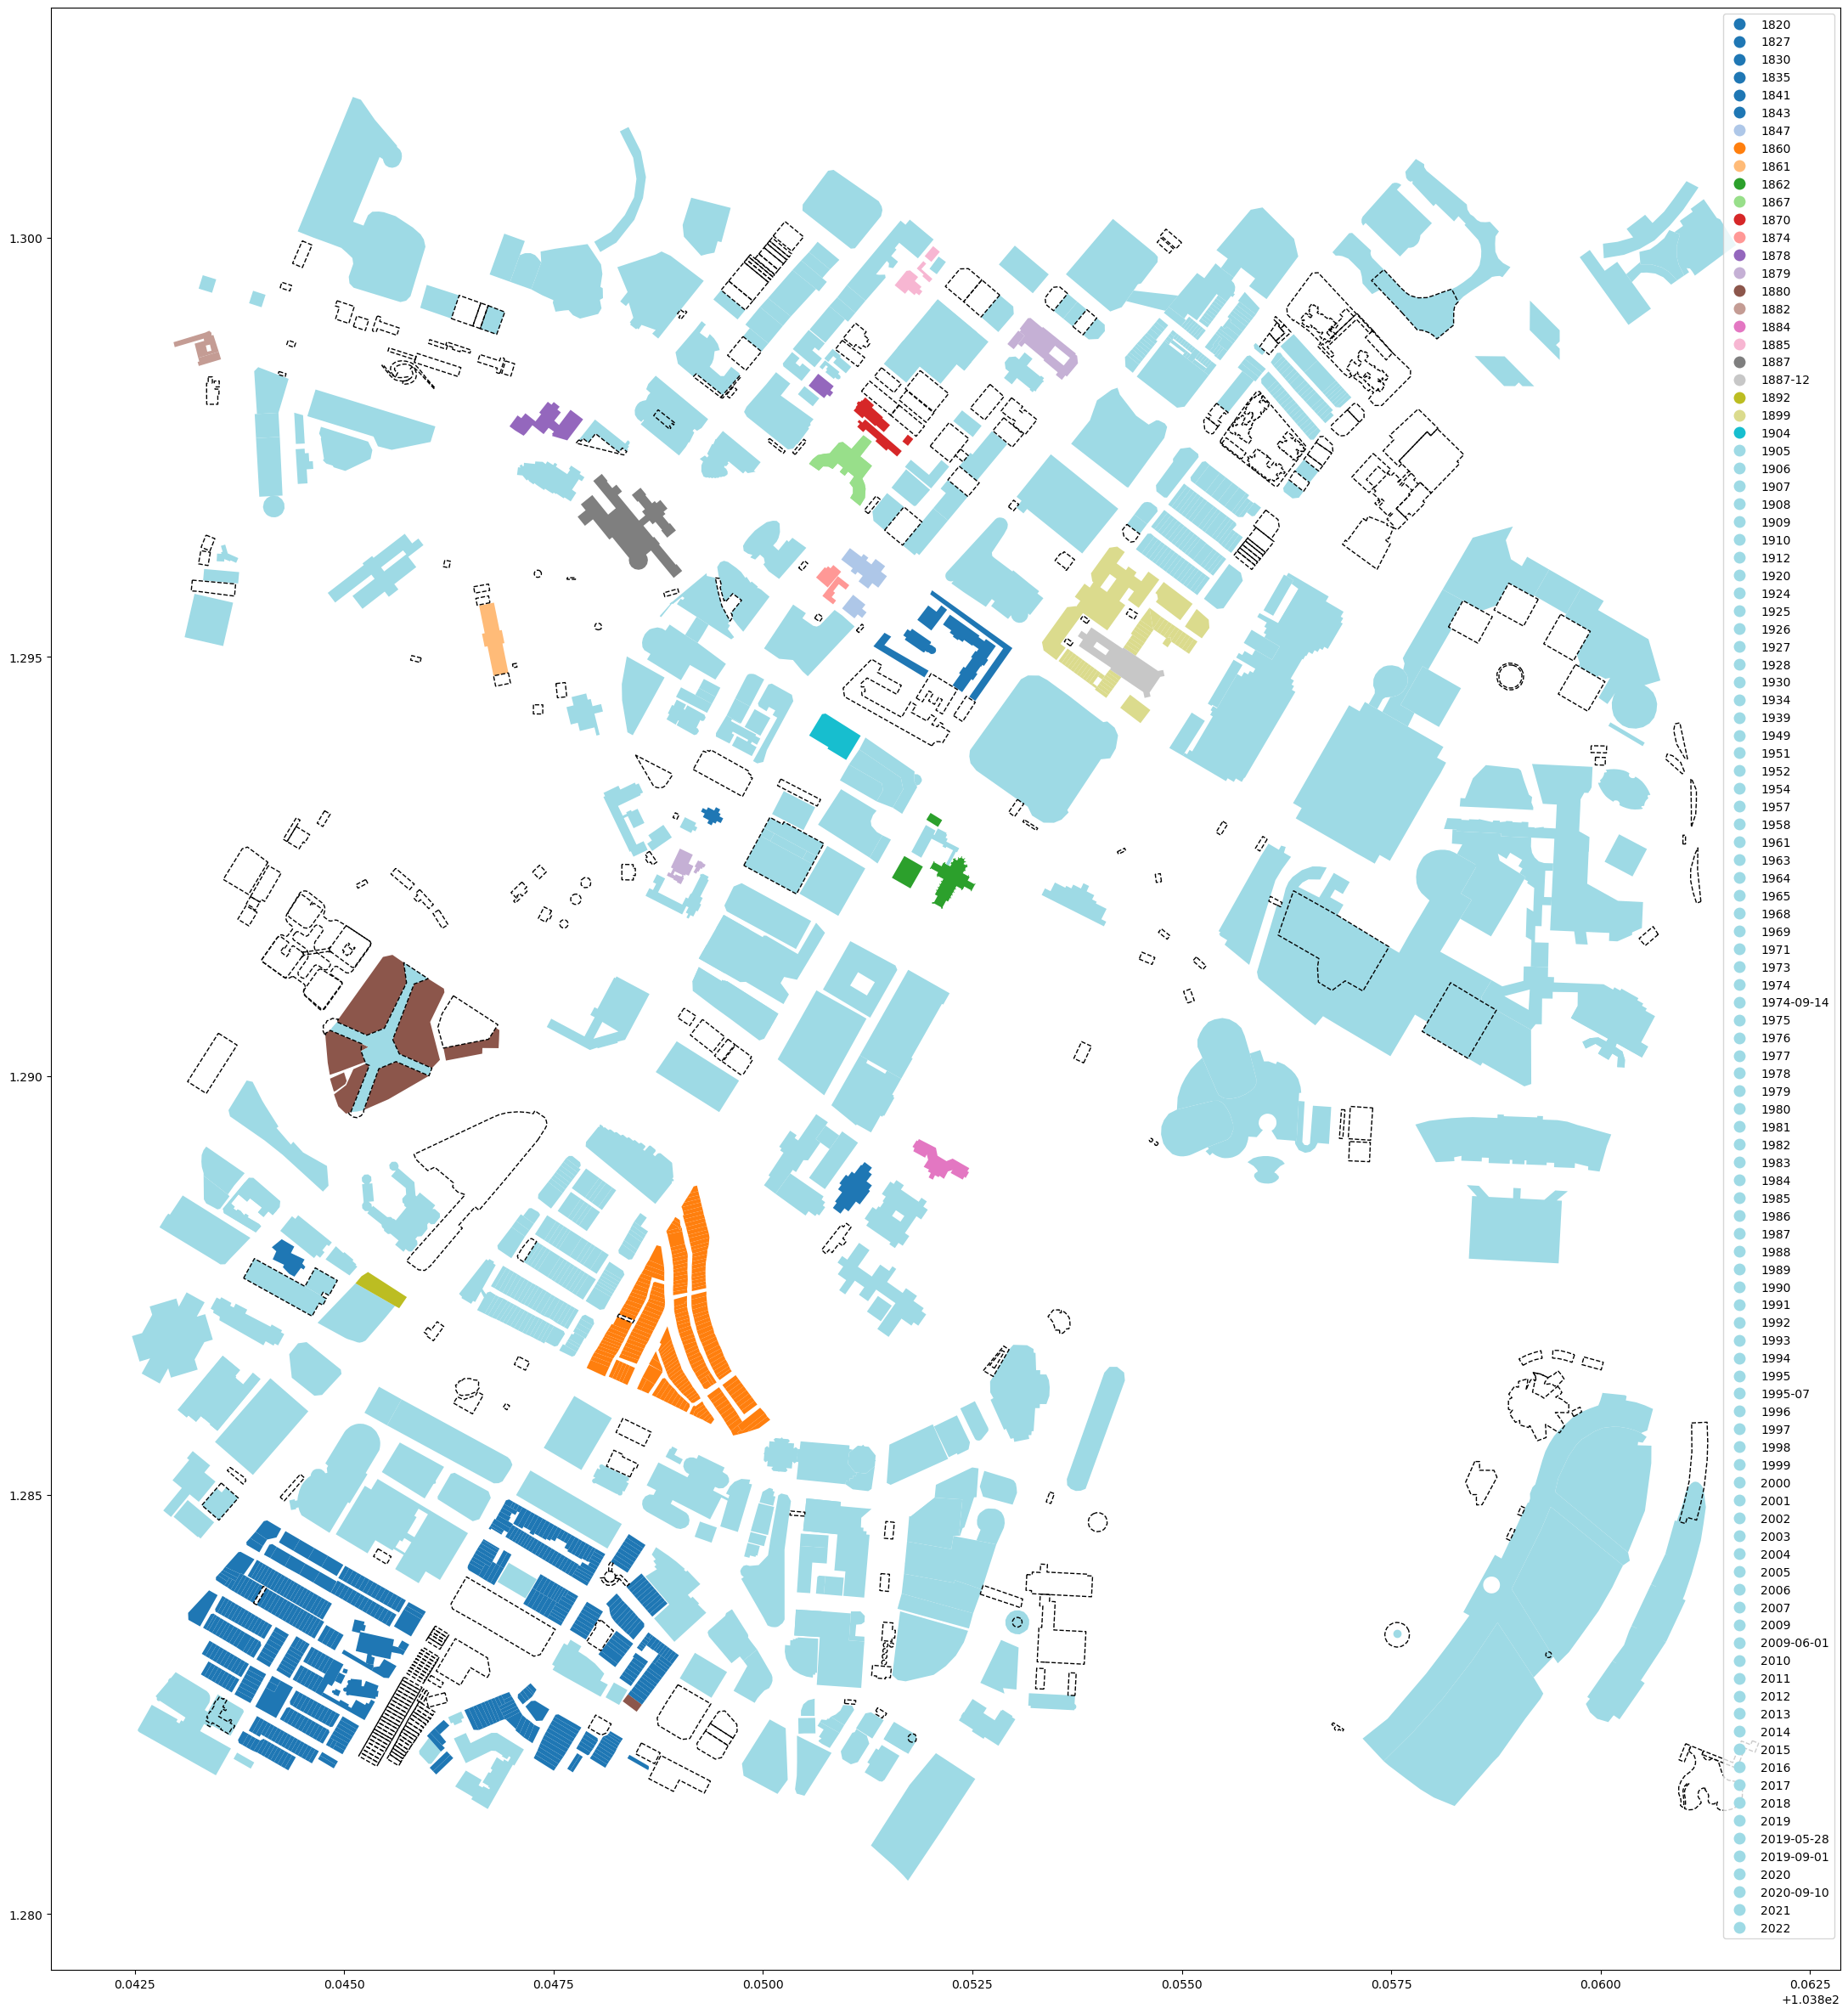

In [66]:
#visualizing building age
fig, ax = plt.subplots(figsize = (30,30))

buildings.plot(column='start_date', ax=ax, 
legend=True,
vmin = 5,
vmax = 25,
cmap='tab20',
)
#show NaN values as separate
mask = buildings['start_date'].isna()

buildings[mask].plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, linestyle='dashed')

<AxesSubplot:>

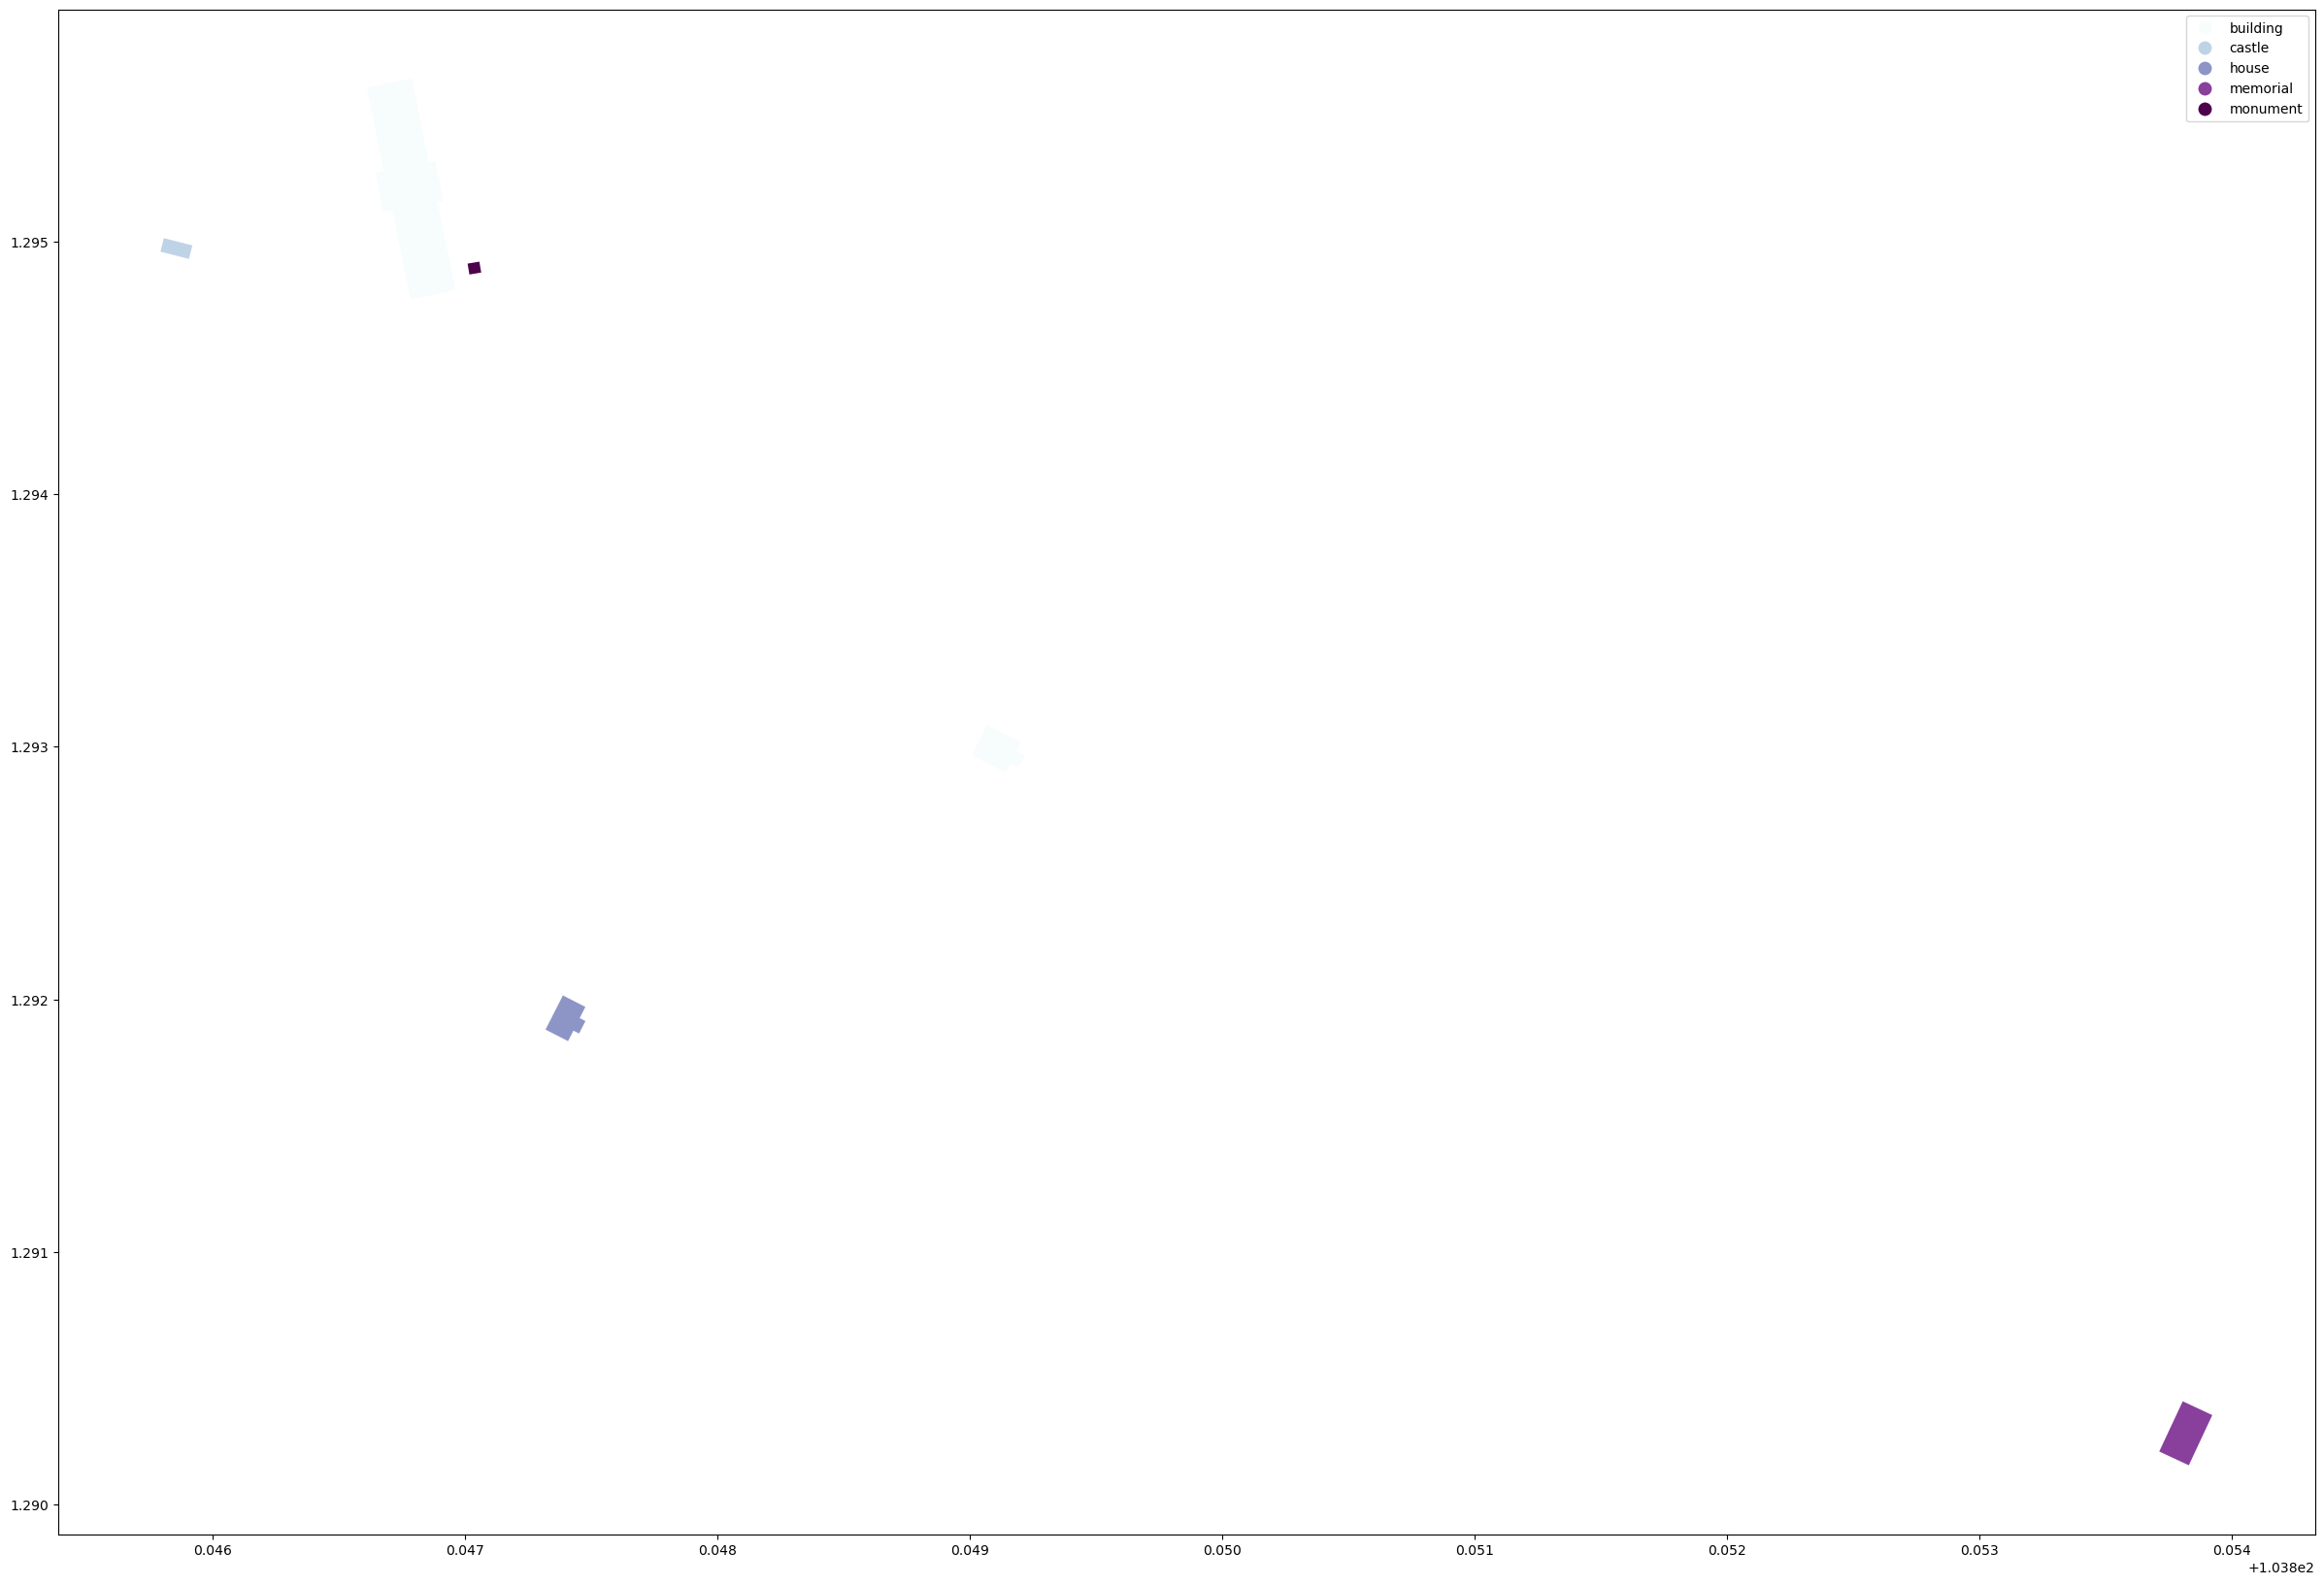

In [23]:
#matplotlib plotting, color buildings based on heritage recognition
fig, ax = plt.subplots(figsize= (30,30))

buildings.plot(column = 'historic', ax=ax,
               legend = True,
               cmap = 'BuPu',
               )

<AxesSubplot:>

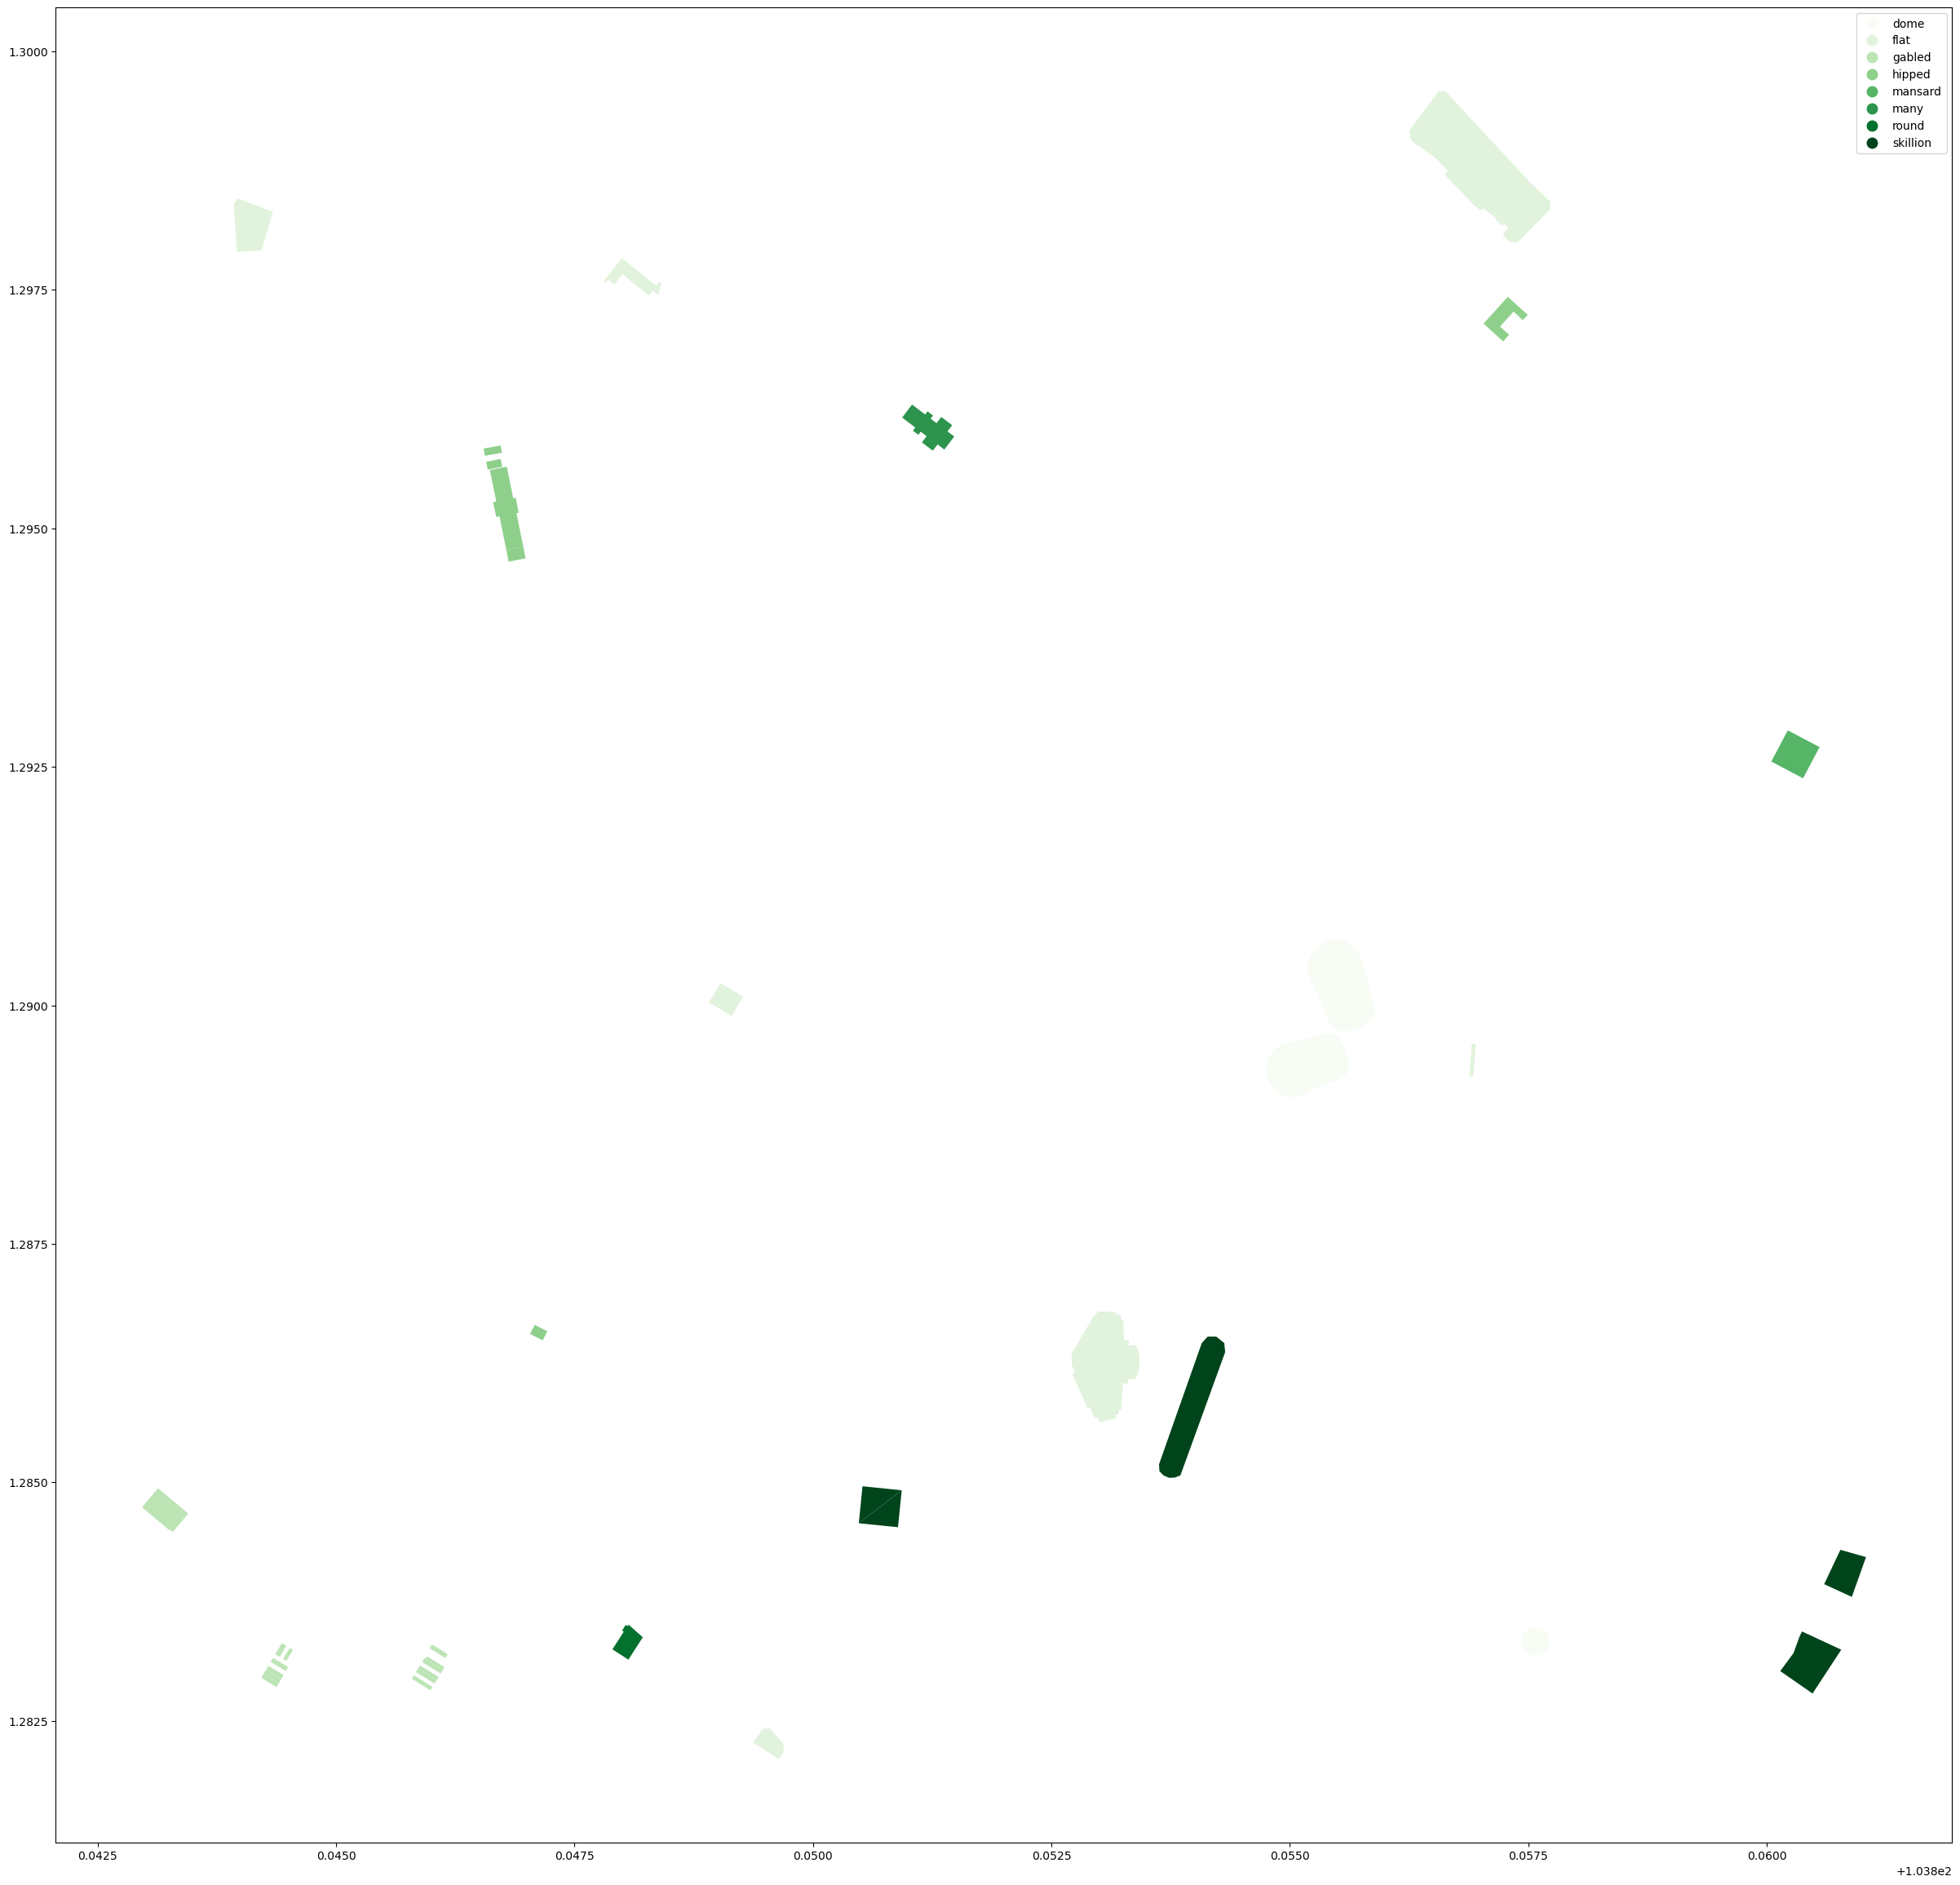

In [41]:
#matplotlib plotting, color buildings based on heritage recognition
fig, ax = plt.subplots(figsize= (30,30))

buildings.plot(column = 'roof:shape', ax=ax,
               legend = True,
               cmap = 'Greens',
               )

<AxesSubplot:>

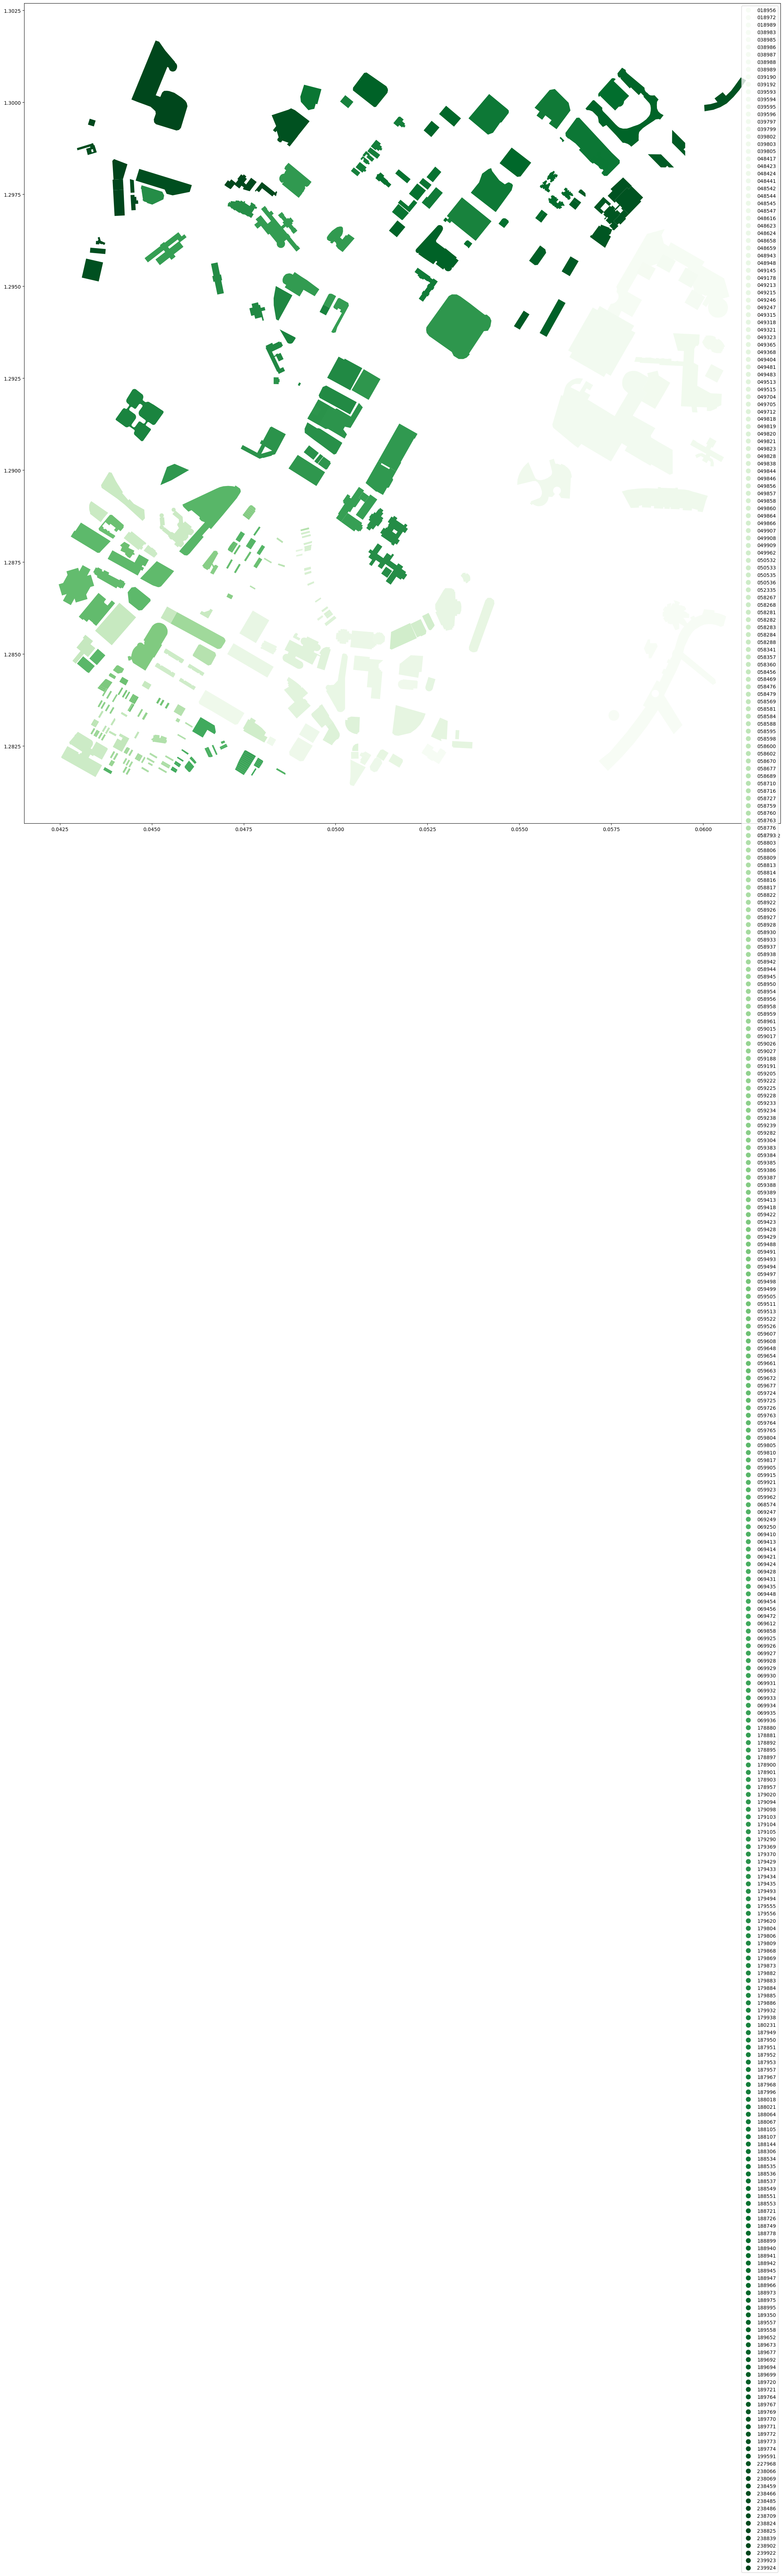

In [43]:
#matplotlib plotting, color buildings based on heritage recognition
fig, ax = plt.subplots(figsize= (30,30))

buildings.plot(column = 'addr:postcode', ax=ax,
               legend = True,
               cmap = 'Greens',
               )

In [79]:
mask = buildings['building']=='yes'
mask.sum()

1456

In [77]:
buildings['building'].count()

1724

<AxesSubplot:>

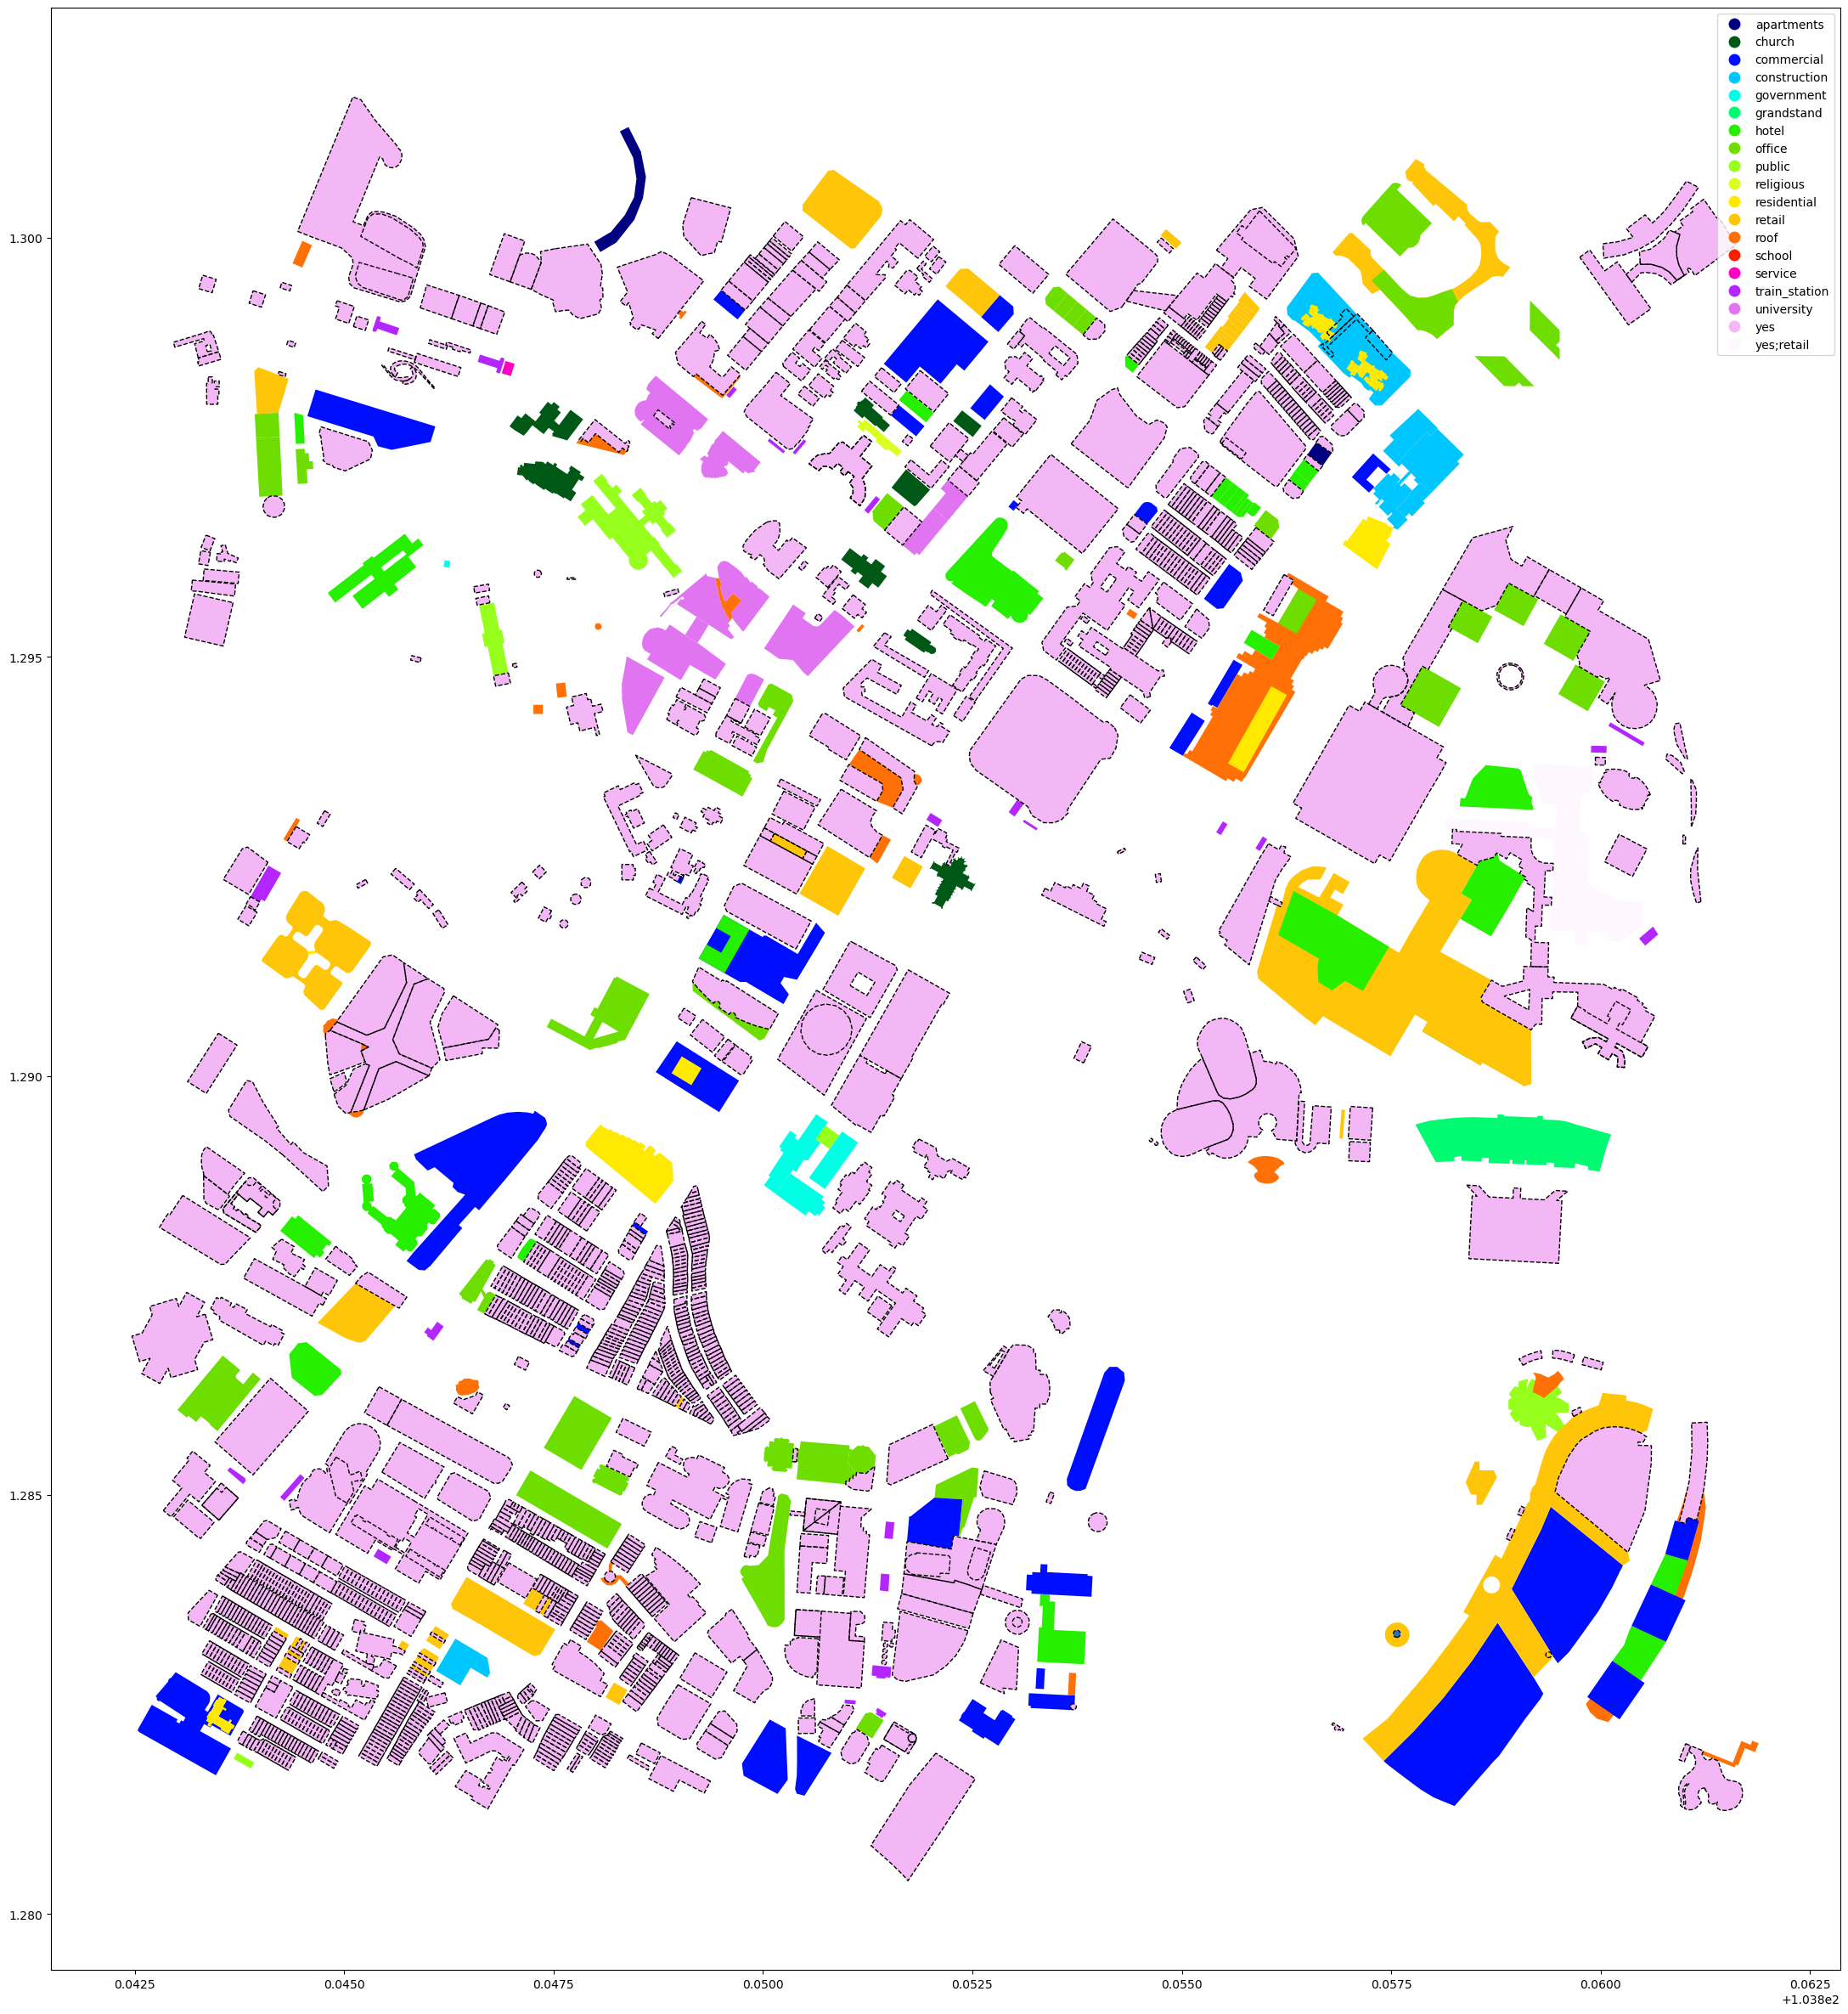

In [80]:
#matplotlib plotting, color buildings based on function/ program
fig, ax = plt.subplots(figsize= (30,30))

buildings.plot(column = 'building', ax=ax,
               legend = True,
               cmap = 'gist_ncar',
               )
#show NaN values as separate
mask = buildings['building']=='yes'

buildings[mask].plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, linestyle='dashed')

<AxesSubplot:>

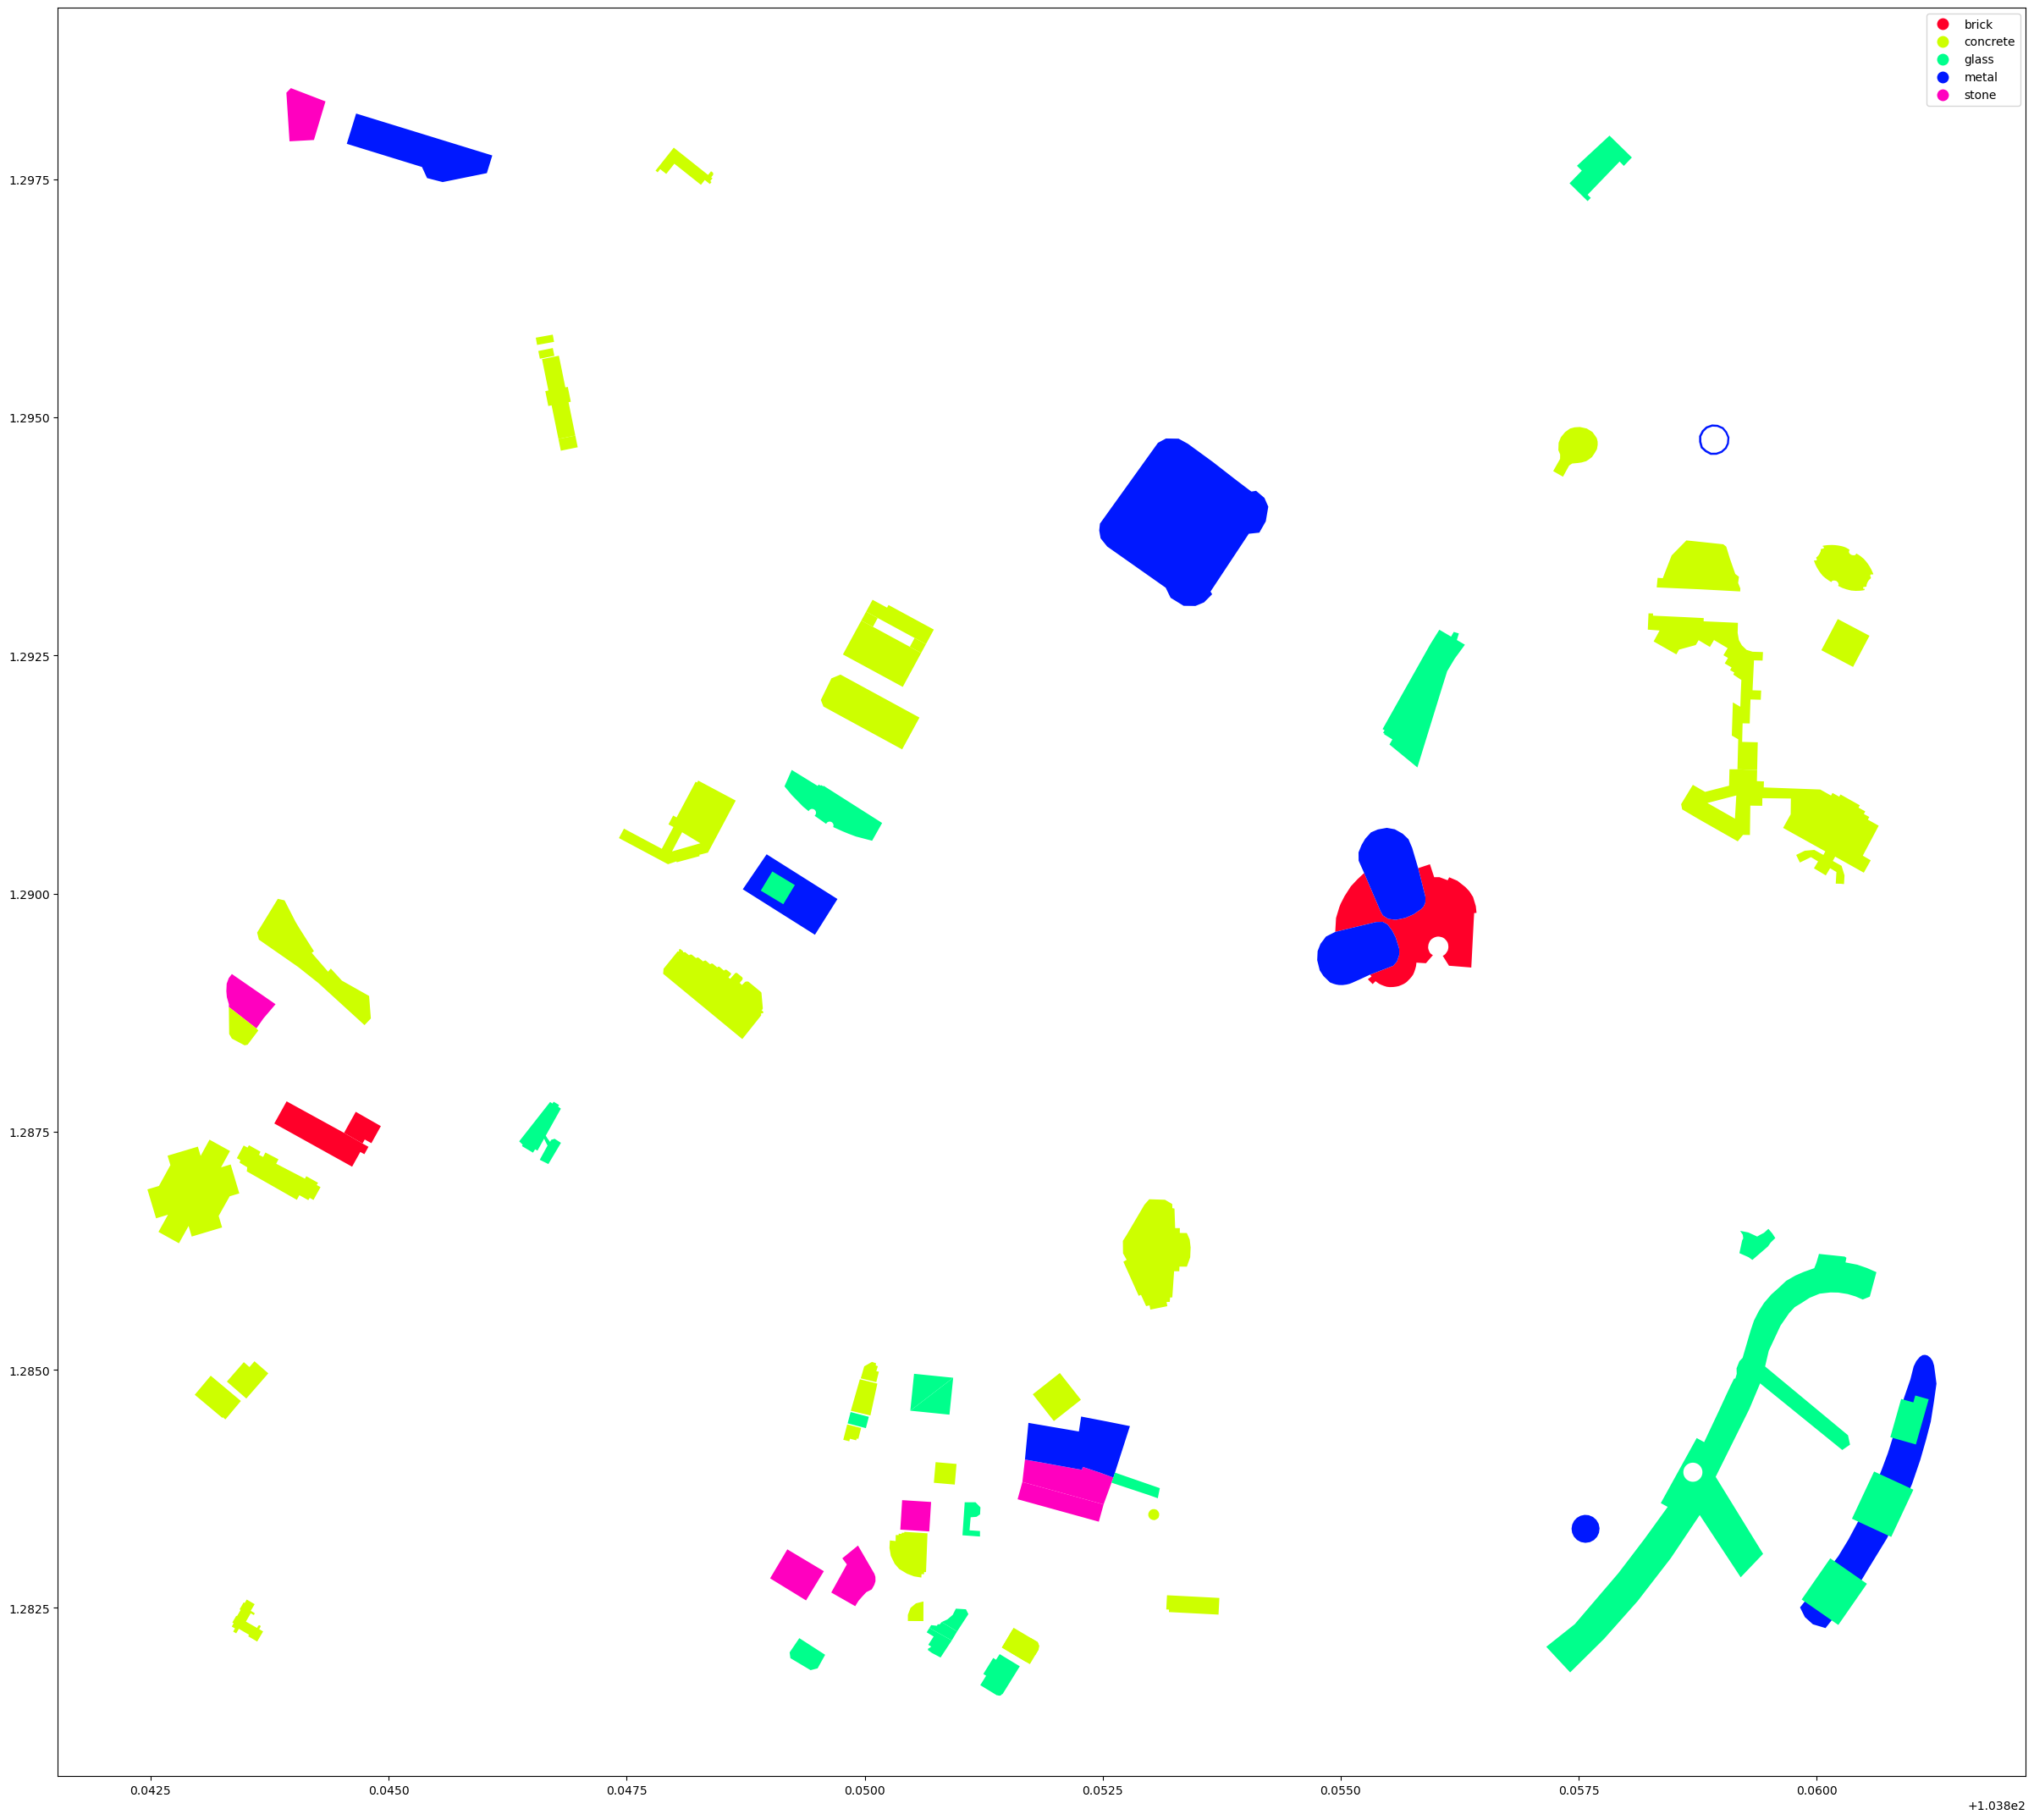

In [81]:
#matplotlib plotting, color buildings based on facade material
fig, ax = plt.subplots(figsize= (30,30))

buildings.plot(column = 'building:material', ax=ax,
               legend = True,
               cmap = 'gist_rainbow',
               )

<AxesSubplot:>

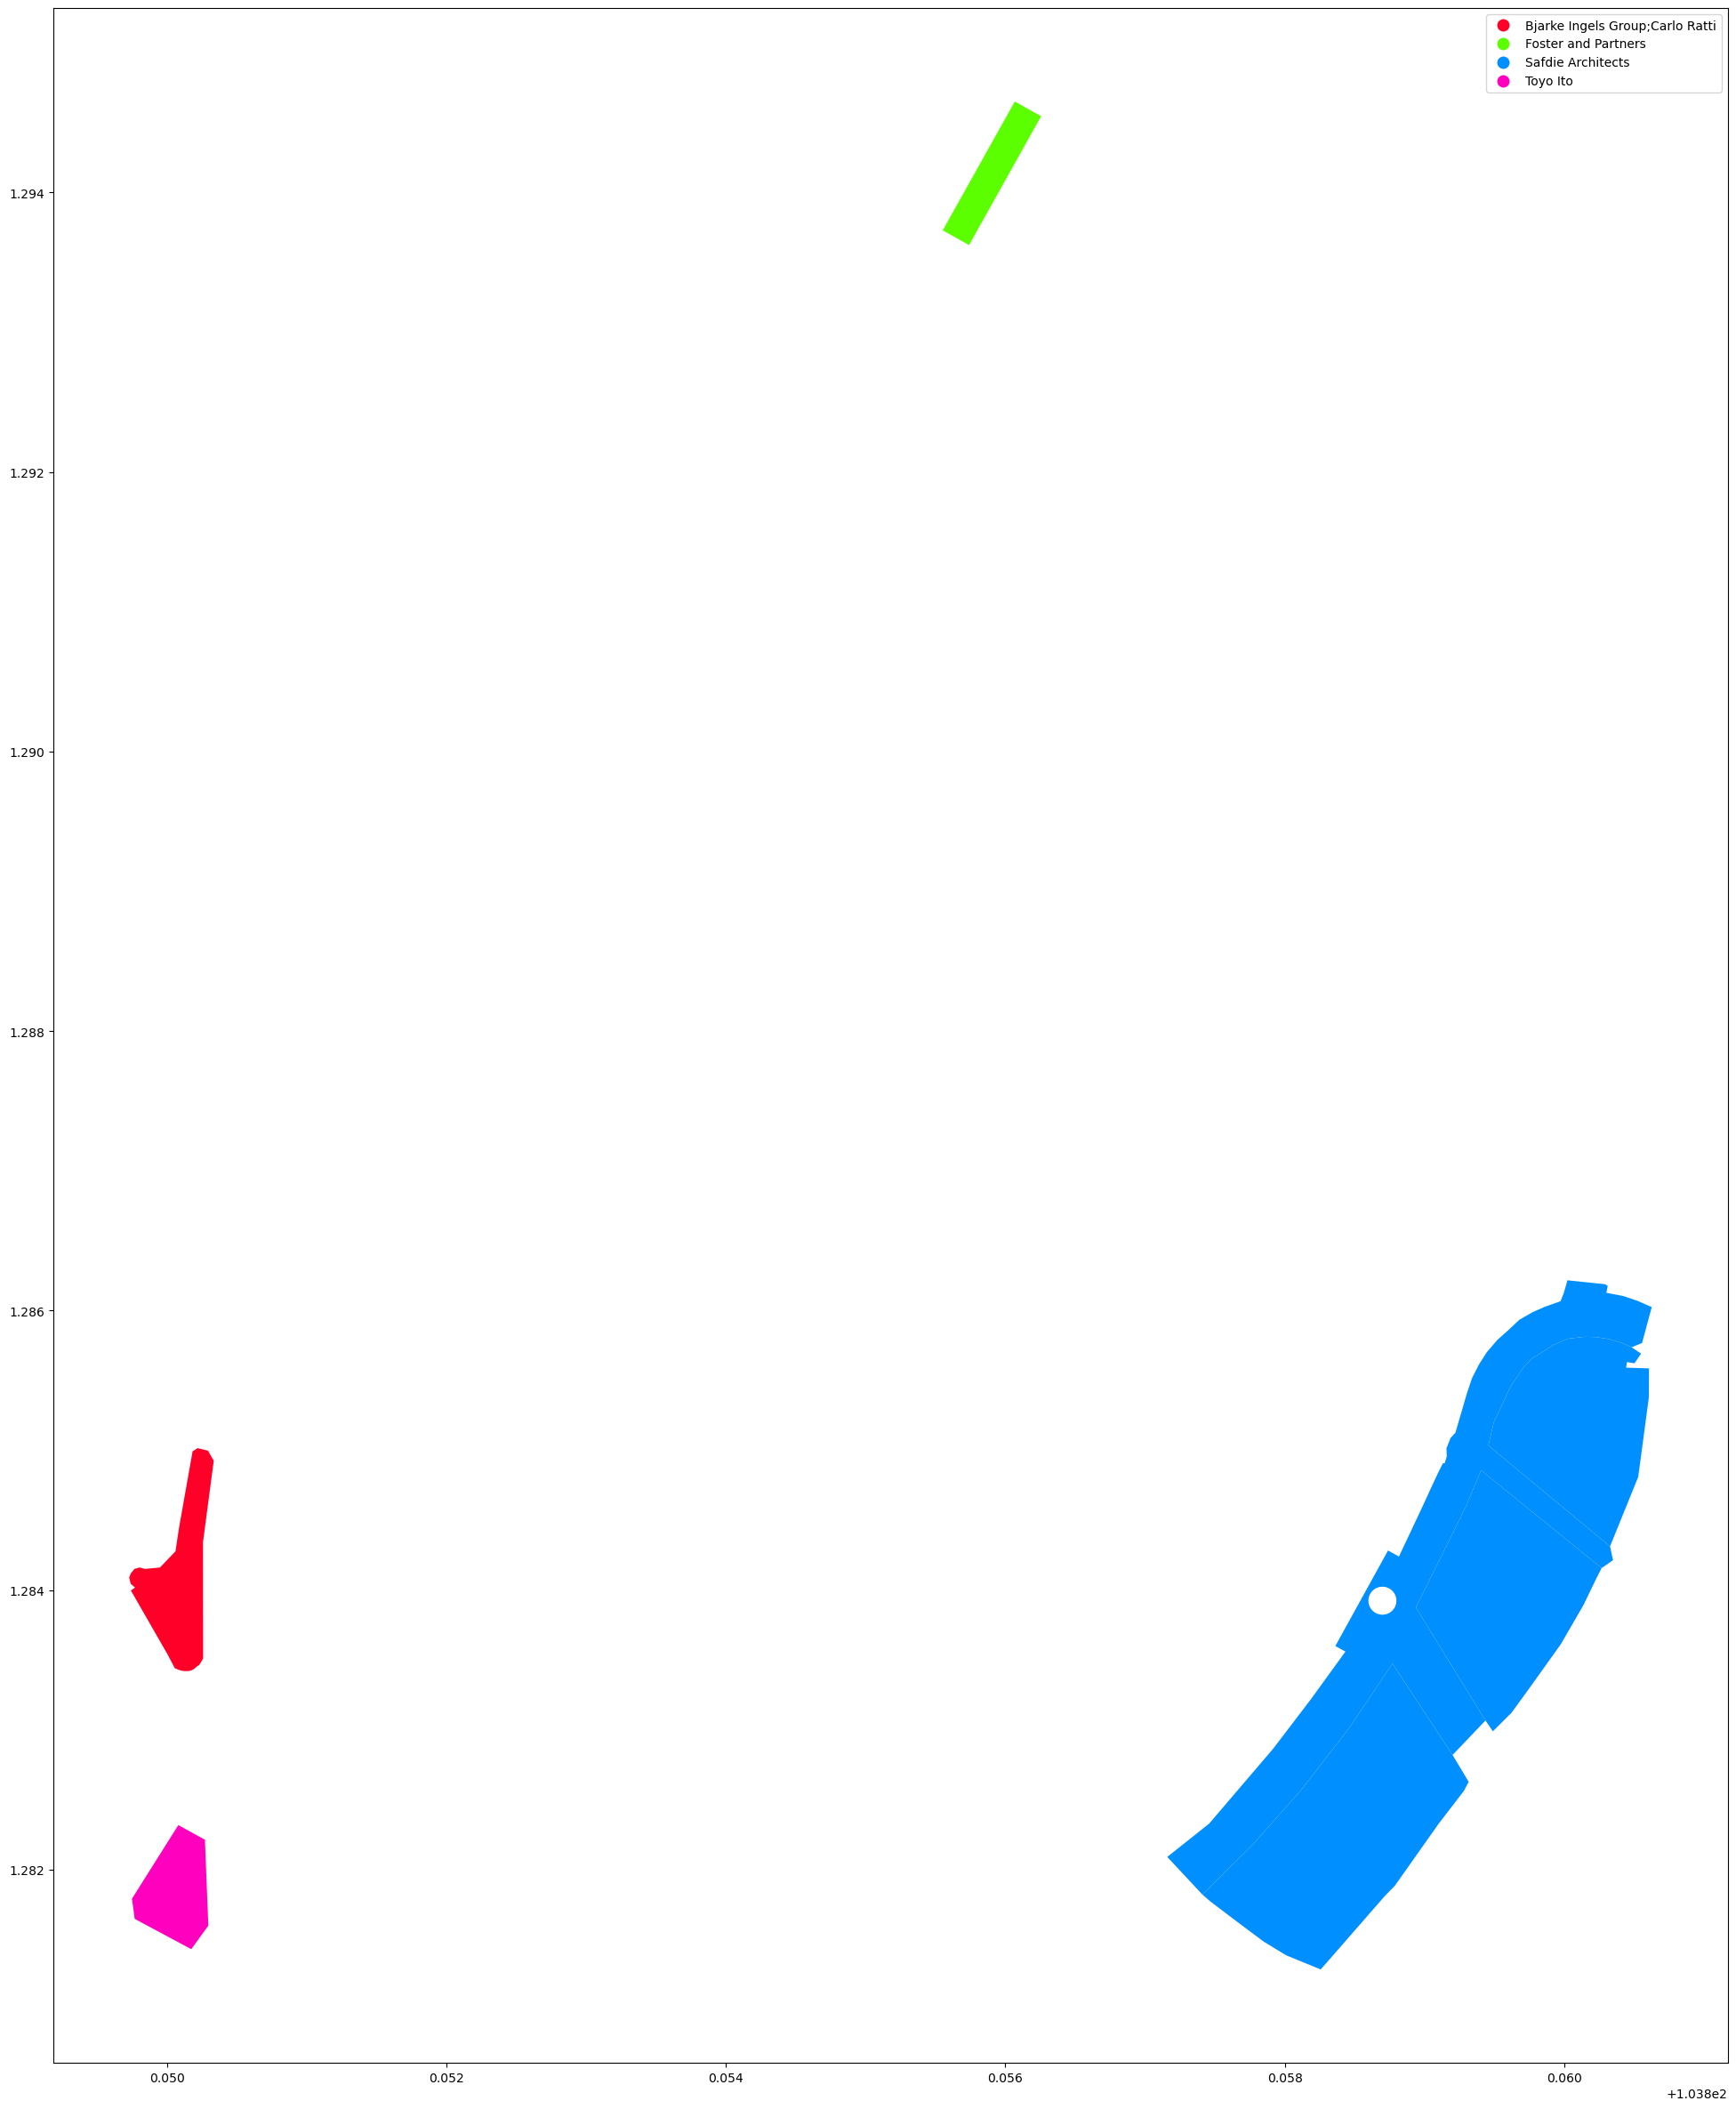

In [86]:
#matplotlib plotting, color buildings based on architect author
fig, ax = plt.subplots(figsize= (30,30))

buildings.plot(column = 'architect', ax=ax,
               legend = True,
               cmap = 'gist_rainbow',
               )

In [28]:
#creating the tags dictionary
tags = {'amenity':True}
#retrieve cafes
cafe = ox.geometries_from_point(point, tags, dist=radius)
cafe.columns

Index(['amenity', 'highway', 'operator', 'geometry', 'cuisine', 'name',
       'wheelchair', 'brand', 'brand:wikidata', 'addr:housename',
       ...
       'heritage:operator', 'roof:type:height', 'building:level', 'landuse',
       'maxstay', 'room', 'capacity:disabled', 'building:min_level', 'ways',
       'type'],
      dtype='object', length=229)

In [29]:
len(cafe)

1740

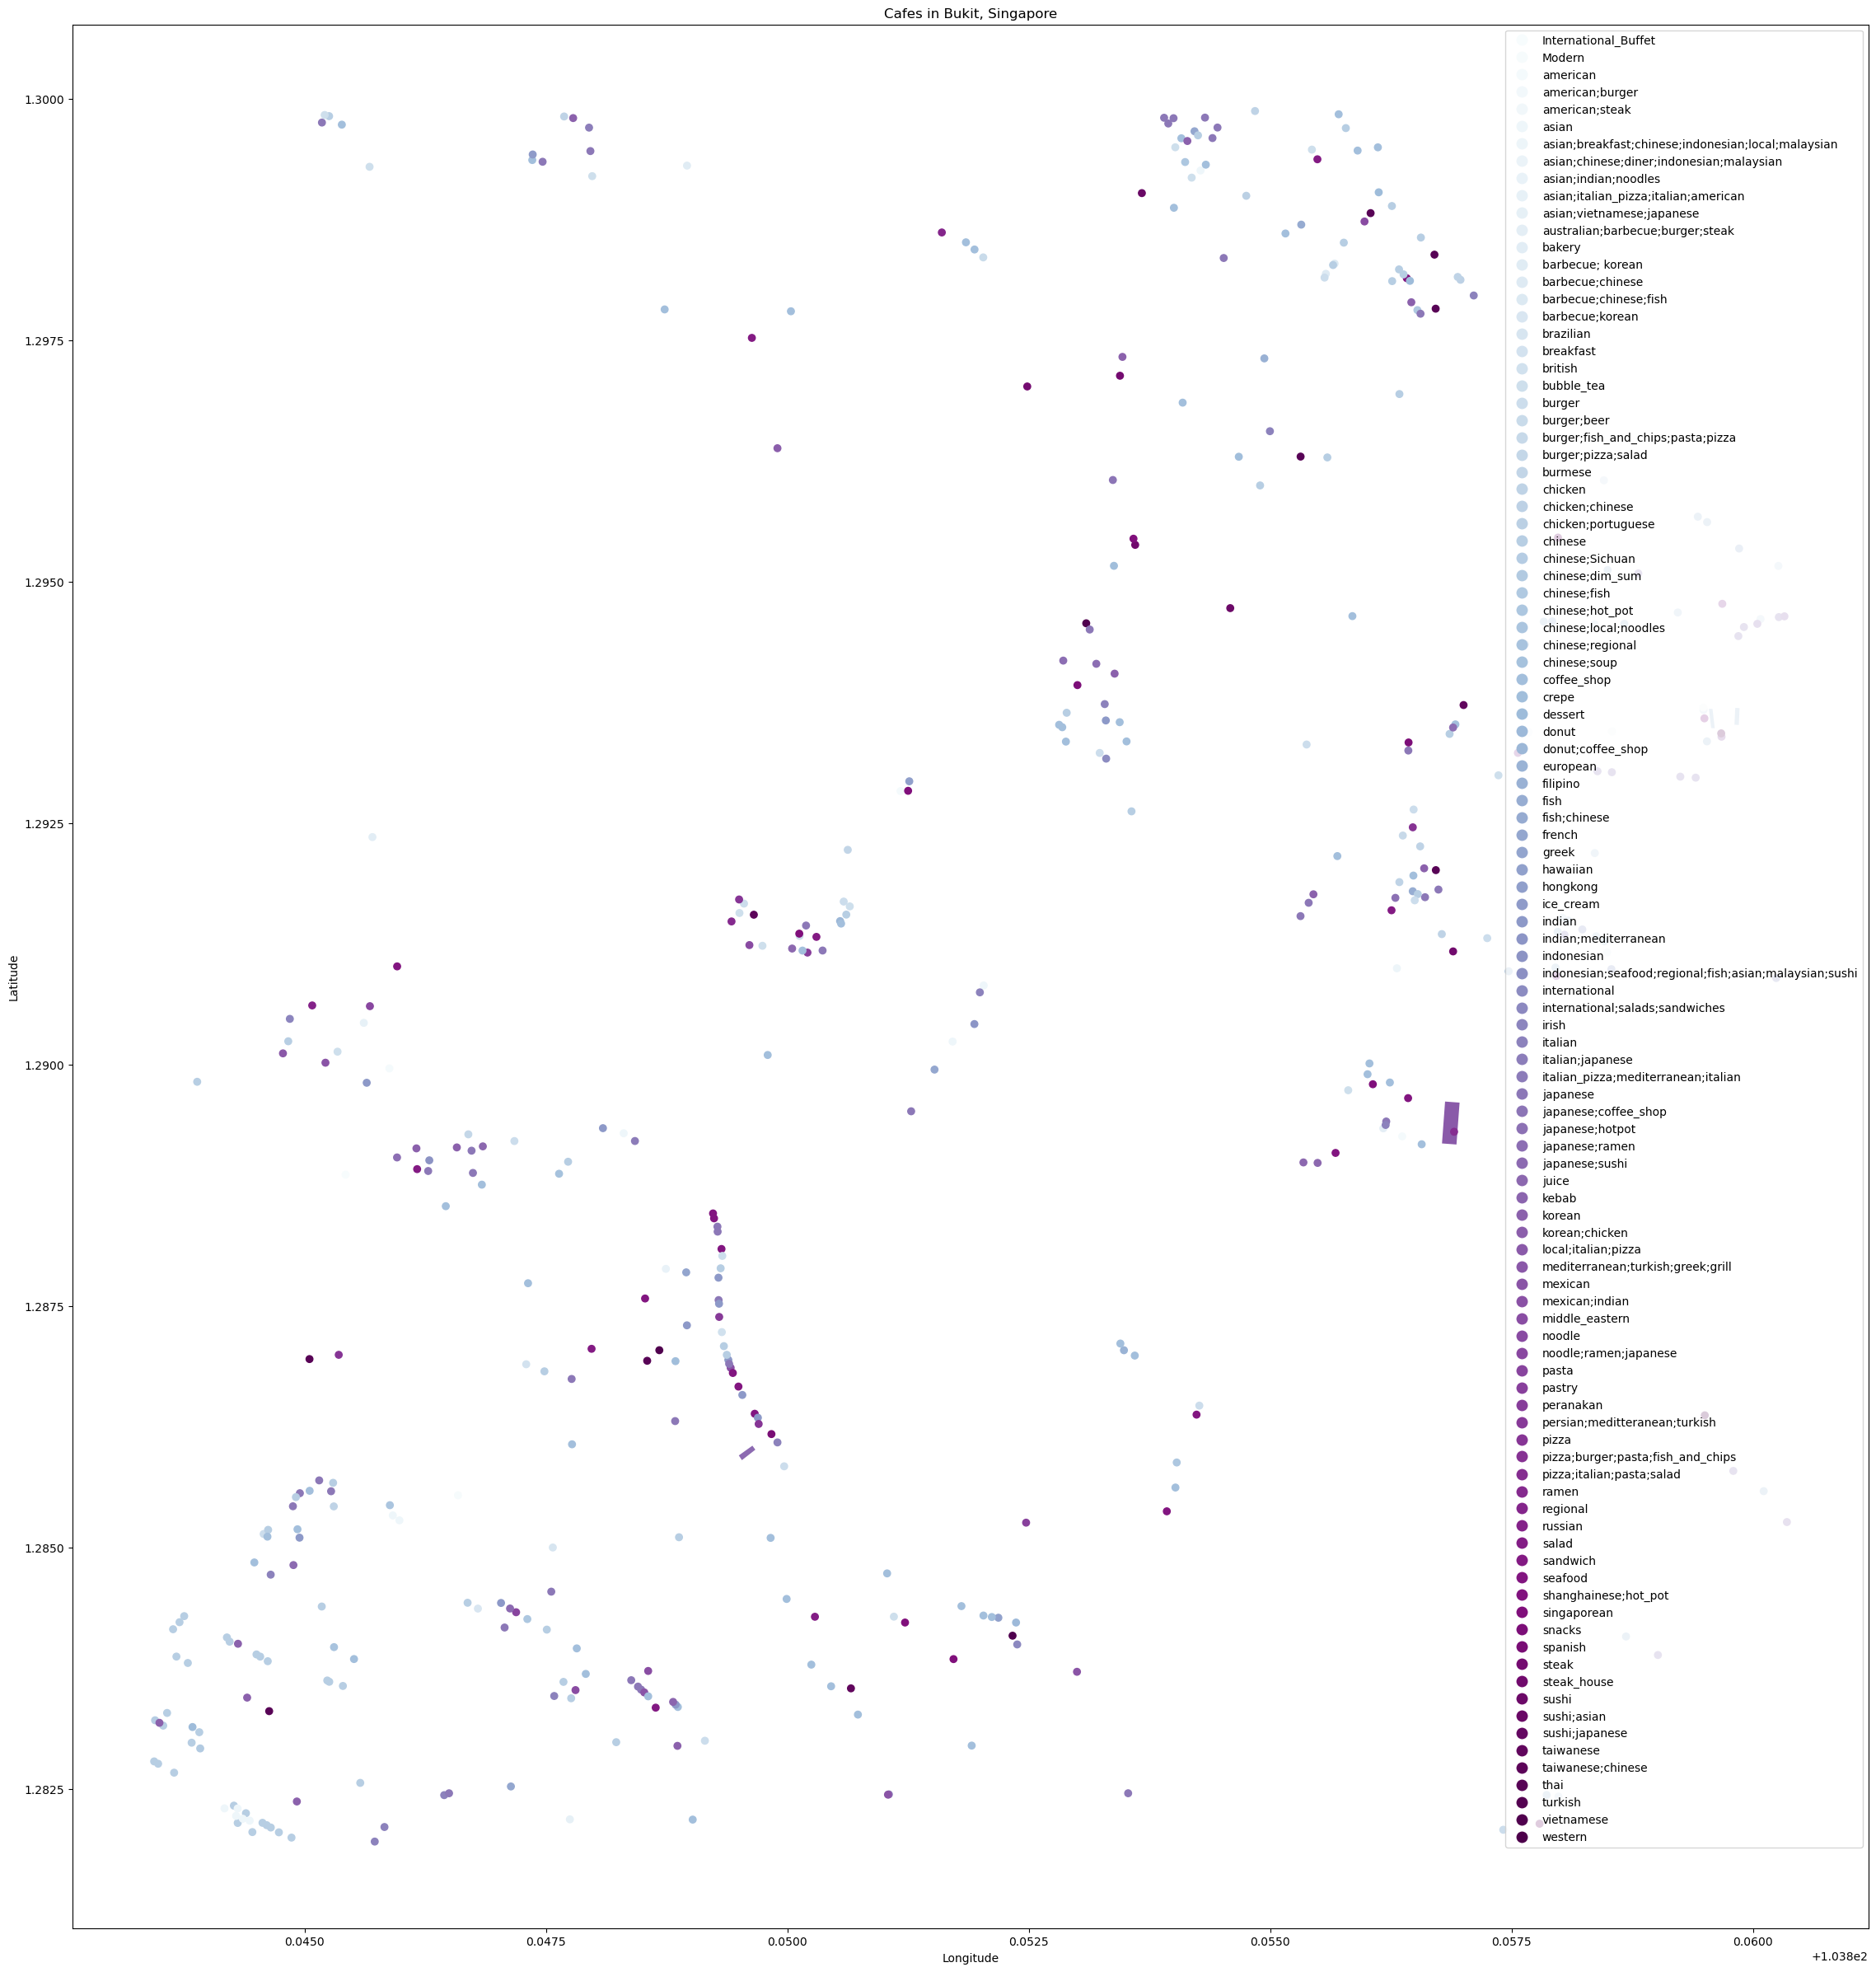

In [40]:
fig, ax = plt.subplots(figsize= (30,30))

cafe.plot(column = 'cuisine', ax=ax,
               legend = True,
               cmap = 'BuPu',
               )

ax.set_title('Cafes in Bukit, Singapore')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

<AxesSubplot:>

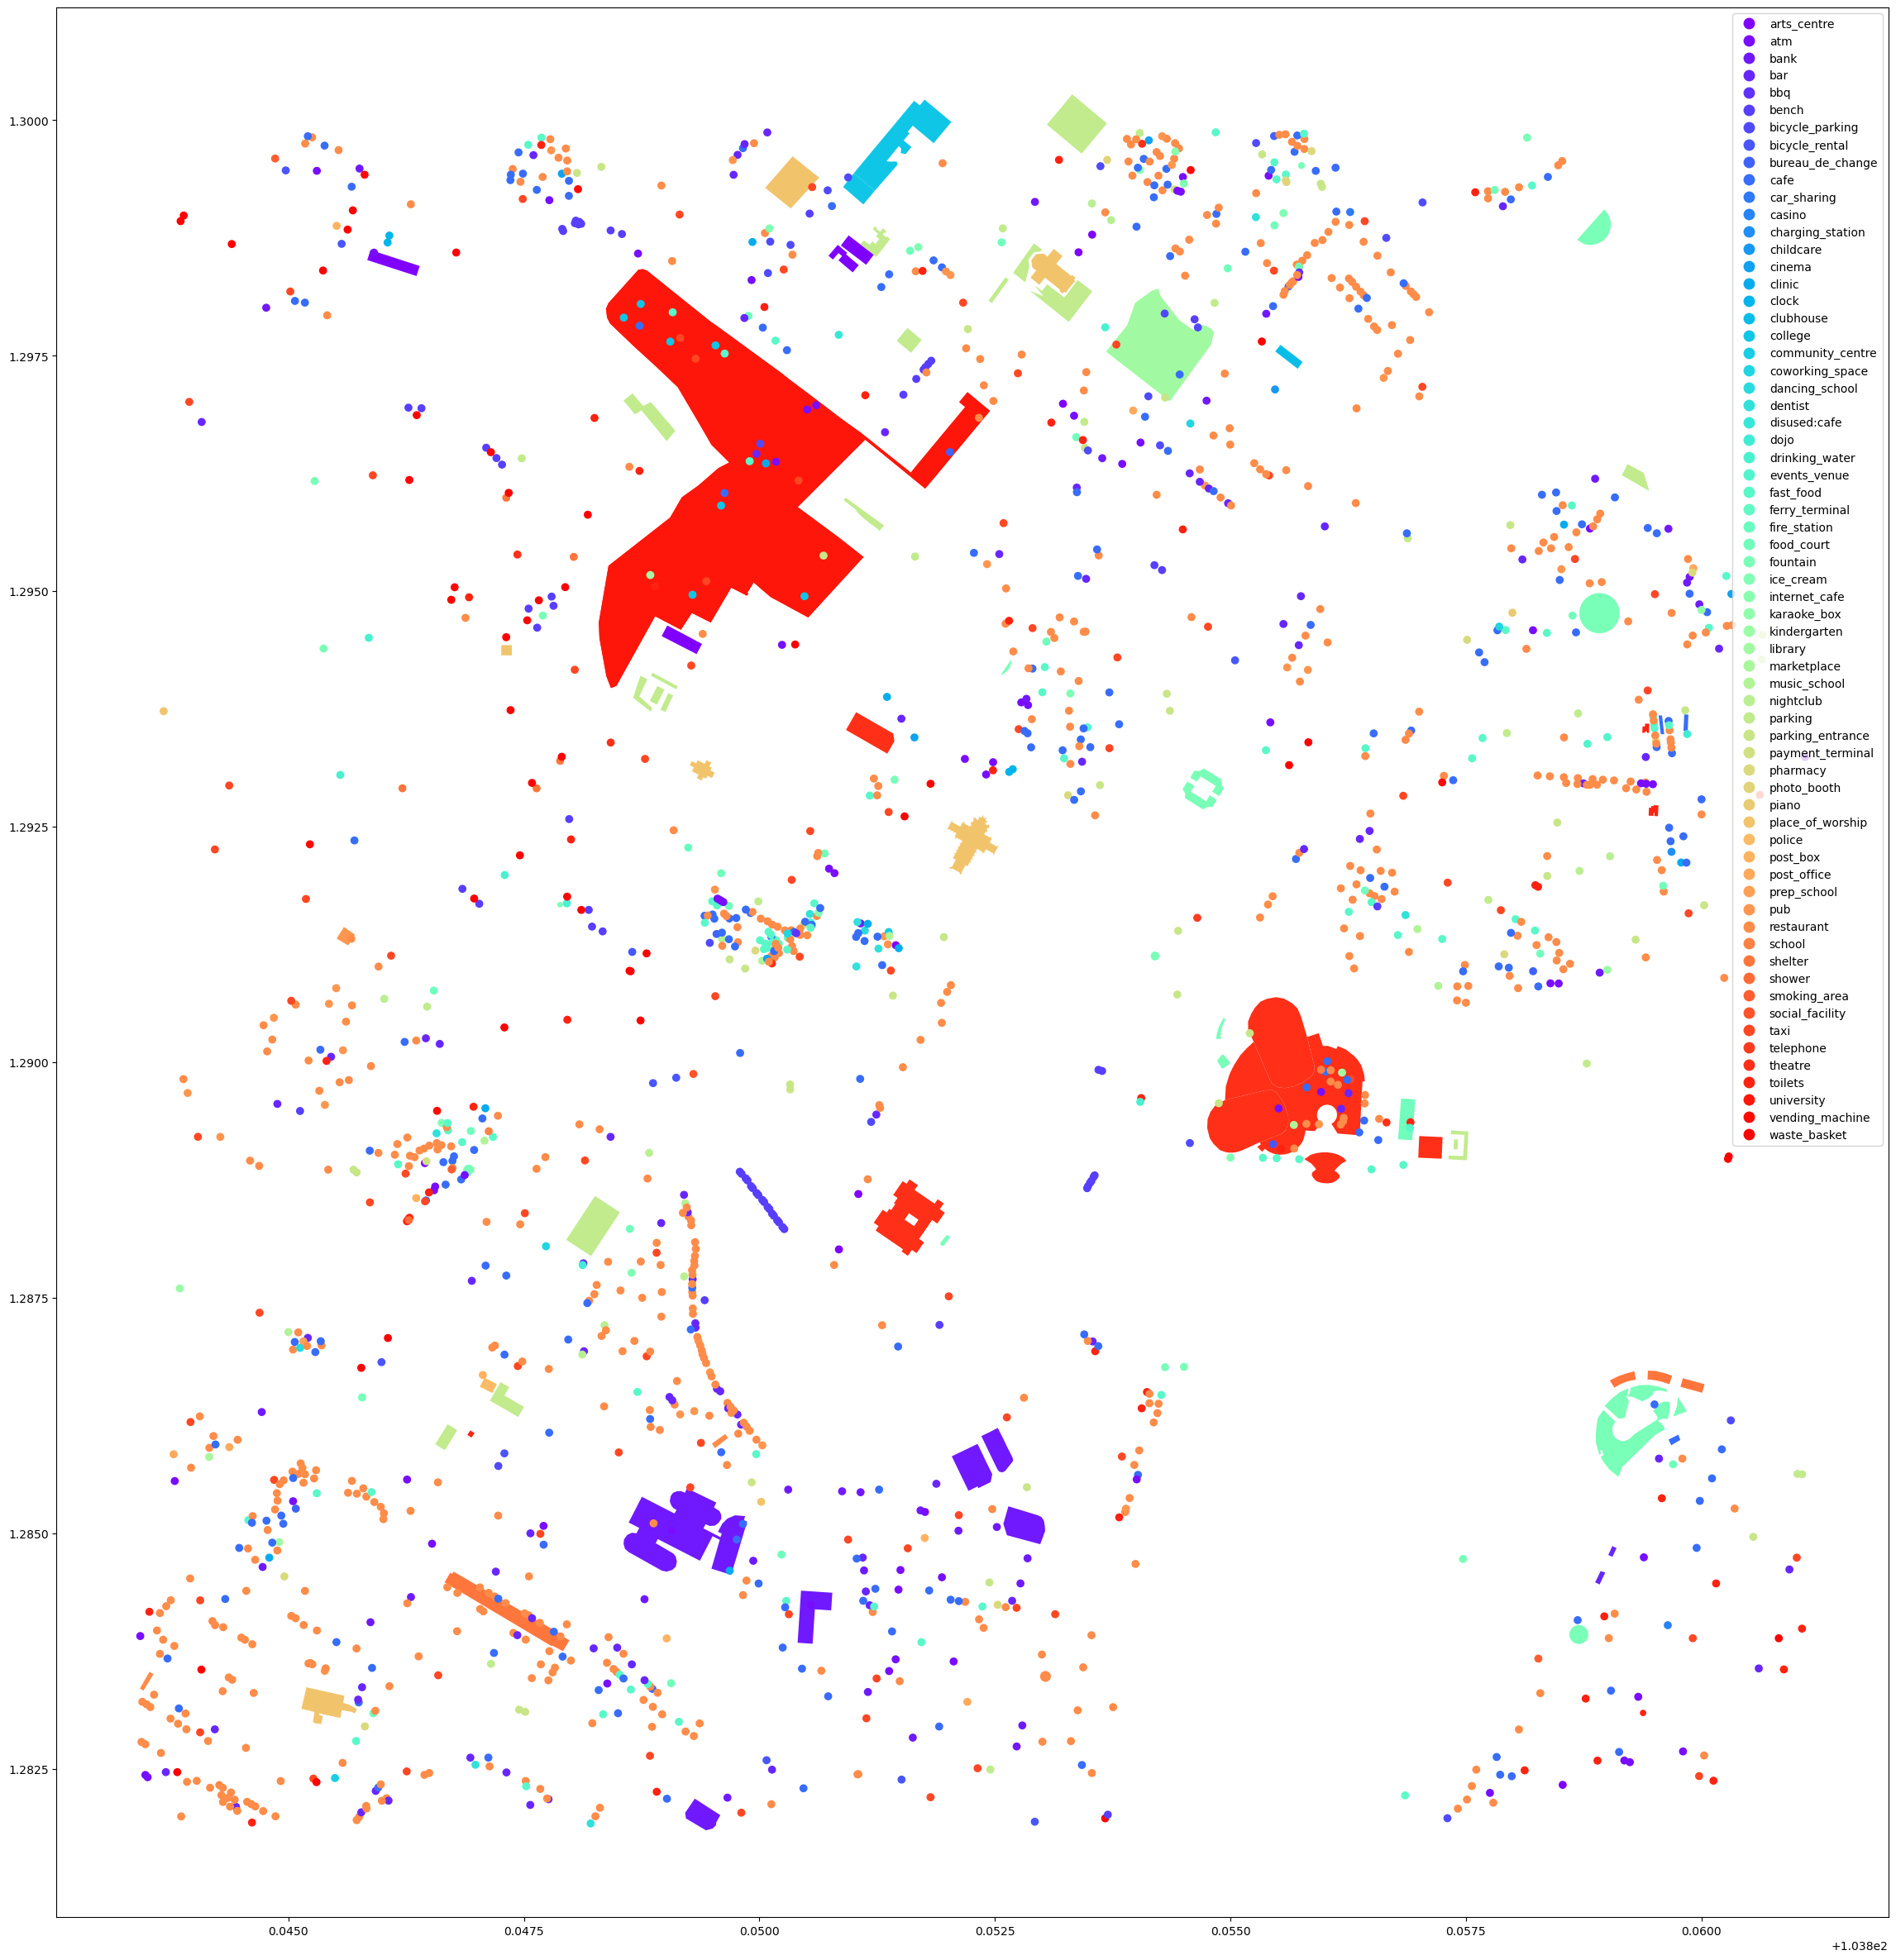

In [89]:
fig, ax = plt.subplots(figsize= (30,30))

cafe.plot(column = 'amenity', ax=ax,
               legend = True,
               cmap = 'rainbow',
               )